In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pystan
import pandas as pd

In [21]:
data = pd.read_csv('/Users/ash/Downloads/cleaned_146_lba.csv')
data = data.drop(columns = ['Unnamed: 0'])

In [3]:
data

,product,store_brand,neighborhood,brand,price
0,apple,ALDI,Neukölln,bio,4.38
1,apple,ALDI,Neukölln,evelina,1.99
2,apple,ALDI,Neukölln,others,2.79
3,apple,ALDI,Schöneberg,others,2.72
4,apple,ALDI,Schöneberg,braeburn,1.39
5,apple,ALDI,Schöneberg,others,2.99
6,apple,ALDI,Lichtenberg,no brand,2.72
7,apple,ALDI,Lichtenberg,others,2.79
8,apple,ALDI,Lichtenberg,no brand,2.39
9,apple,Lidl,Kreuzberg,bio,3.13


In [35]:
model_spec = """

data {
//Number of store
    int<lower=1> S;
//Number of product brand
    int<lower=1> B;
//Number of location
    int<lower=1> L;
//Number of datapoint
    int<lower=1> N;
    
//A vector of 0/1 in each entry expressing which store, brand, or location the datapoint is
    vector<lower=0>[S] store[N];
    vector<lower=0>[B] brand[N];
    vector<lower=0>[L] loc[N];

//Price of the datapoint
    real<lower=0> price[N];
}

parameters {

//Variance for the normal distribution centered around the multiplied price
    real<lower=0> v;
//Base price for the 
    real<lower=0> base;
    row_vector<lower=0>[S] mul_S;
    row_vector<lower=0>[B] mul_B;
    row_vector<lower=0>[L] mul_L;
}

model {
    
    base ~ cauchy(0,1);
    v ~ gamma(1,1); 
    for (s in 1:S){
        mul_S[s] ~ lognormal(0,0.25);
    }
    
    for (b in 1:B){
        mul_B[b] ~ lognormal(0,0.25);
    }
    
    for (l in 1:L){
        mul_L[l] ~ lognormal(0,0.25);
    }
    
    for(i in 1:N) {
        price[i] ~ normal(base*((mul_S*store[i])*(mul_B*brand[i])*(mul_L*loc[i])), v); 
    }
}

"""
model_1 = pystan.StanModel(model_code=model_spec)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_3f1ec90b59061dde0ea5e6f73c627a5c NOW.
/Users/ash/anaconda3/lib/python3.6/site-packages/Cython/Compiler/Main.py:367: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /var/folders/kg/zv3bhpmx19s5f8hsk7h4_wnc0000gn/T/tmpkagprta7/stanfit4anon_model_3f1ec90b59061dde0ea5e6f73c627a5c_3157645950687742196.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)


In [36]:
def produce_stan_data(product, data=data): 
    processed = data.loc[data['product'] == product].drop(columns=['product'])
    processed = processed.sample(frac=1.0)
    
    store = pd.get_dummies(processed['store_brand'])
    name_s = store.columns
    store = np.array(store, dtype=int)
    
    brand = pd.get_dummies(processed['brand'])
    name_b = brand.columns
    brand = np.array(brand, dtype=int)
    
    loc = pd.get_dummies(processed['neighborhood'])
    name_l = loc.columns
    loc = np.array(loc, dtype=int)
    
    price = np.array(processed['price'], dtype=float)
    
    data_dict = {
        'S': store.shape[1],
        'B': brand.shape[1],
        'L': loc.shape[1],
        'N': store.shape[0],
        
        'store': store, 
        'brand': brand, 
        'loc': loc, 
        
        'price': price
    }
    
    name_dict = {
        'store': name_s,
        'brand': name_b,
        'loc': name_l
    }
    return data_dict, name_dict

In [37]:
def plot_multiplier_variance(results, name, what): 
    if what == 'store': 
        what_ = 'mul_S'
    elif what == 'brand':
        what_ = 'mul_B'
    else: 
        what_ = 'mul_L'
    mul = results[what_]
    plt.figure(figsize=(12,8))
    for _ in range(mul.shape[1]):
        plt.hist(mul[:,_], alpha=0.35, bins=30, density=True, label=str(name[what][_])+': {0:.3f}'.format(mul[:,_].mean()))
        plt.scatter(mul[:,_].mean(),0, marker='x', s=40)
    plt.legend()
    plt.title('Multiplers for {}'.format(what))
    mul = mul.reshape(-1,1)
    plt.figure(figsize=(12,8))
    plt.hist(mul, alpha=0.35, bins=30, density=True, label='var: {0:.3f}'.format(mul.var()))
    plt.scatter(mul.mean(), 0, marker='x', s=40, label='mean: {0:.3f}'.format(mul.mean()))
    plt.title('All multipliers')
    plt.legend()
    plt.show()
    print('95% CI for all {} multipliers is:'.format(what), (np.percentile(mul,2.5),np.percentile(mul,97.5)))
    return mul
    
def summarize_product(product):
    stan_data, name = produce_stan_data(product)
    results = model_1.sampling(data=stan_data)
    
    print('***'*39)
    print('Summary of sampling results for {}:'.format(product))
    print('***'*39)
    
    print('___BASE PRICE___')
    base = results['base']
    plt.figure(figsize=(12,8))
    plt.hist(base, alpha=0.35, bins=30, density=True, label='var: {0:.3f}'.format(base.var()))
    plt.scatter(base.mean(), 0, marker='x', s=40, label='mean: {0:.3f}'.format(base.mean()))
    plt.title('Base price')
    plt.legend()
    print('95% CI for base price is:', (np.percentile(base,2.5),np.percentile(base,97.5)))
    plt.show()
    
    dumb = []
    for _ in ['store', 'brand', 'loc']:
        print('___{}___'.format(_.upper()))
        dumb.append(plot_multiplier_variance(results,name,_))
        
    print('___EFFECT OF EACH MULTIPLIER___')
    plt.figure(figsize=(12,8))
    for i in range(len(dumb)):
        dumb_2 = ['store', 'brand', 'loc']
        plt.hist(dumb[i], alpha=0.35, bins=30, density=True, label='{}'.format(dumb_2[i]))
        plt.scatter(dumb[i].mean(), 0, marker='x', s=40, label='mean: {0:.3f}'.format(dumb[i].mean()))
    plt.axvline(x=1, color='r')
    plt.legend()
    plt.title('Effect of each multipler')
    plt.show()

*********************************************************************************************************************
Summary of sampling results for apple:
*********************************************************************************************************************
___BASE PRICE___
95% CI for base price is: (1.4890111492626024, 2.8210850902247997)


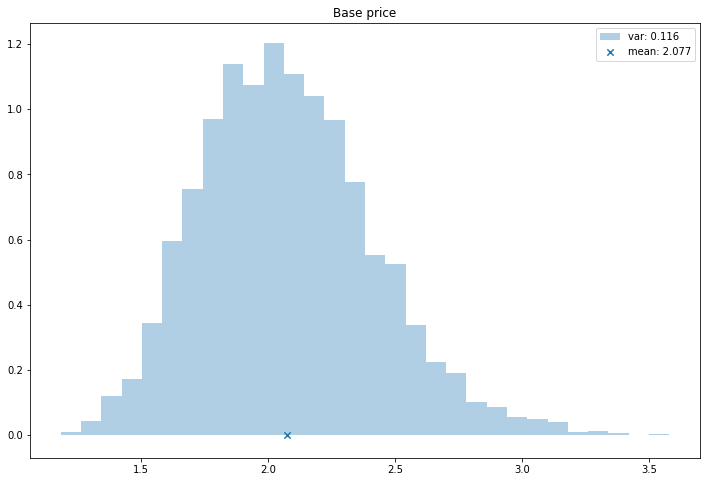

___STORE___


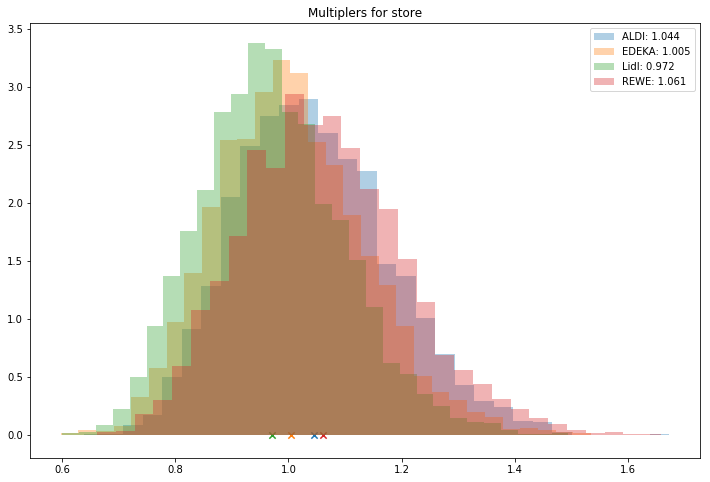

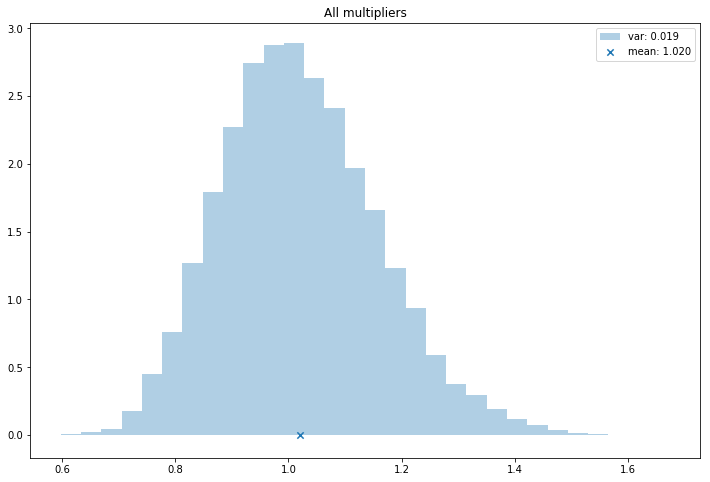

95% CI for all store multipliers is: (0.7763202059354631, 1.3212199274114351)
___BRAND___


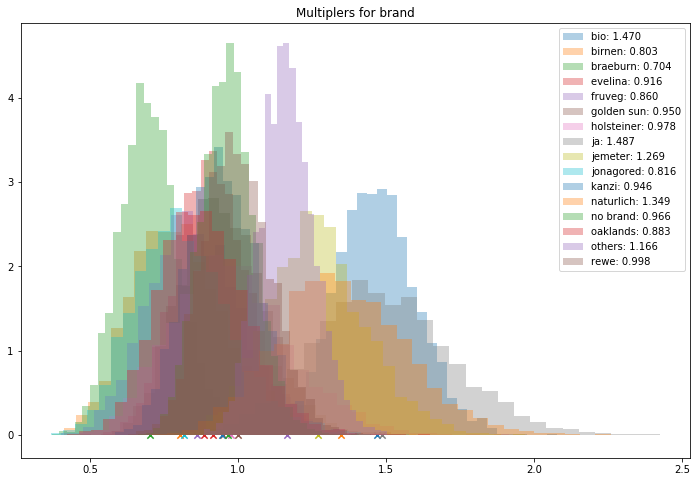

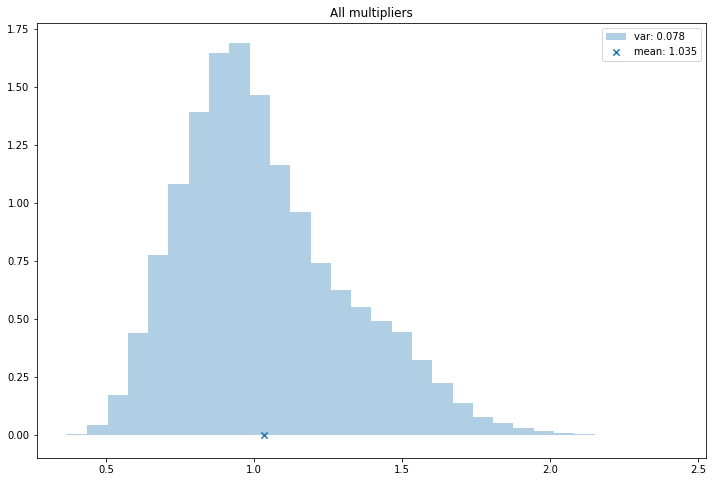

95% CI for all brand multipliers is: (0.6005962840670279, 1.658761080202495)
___LOC___


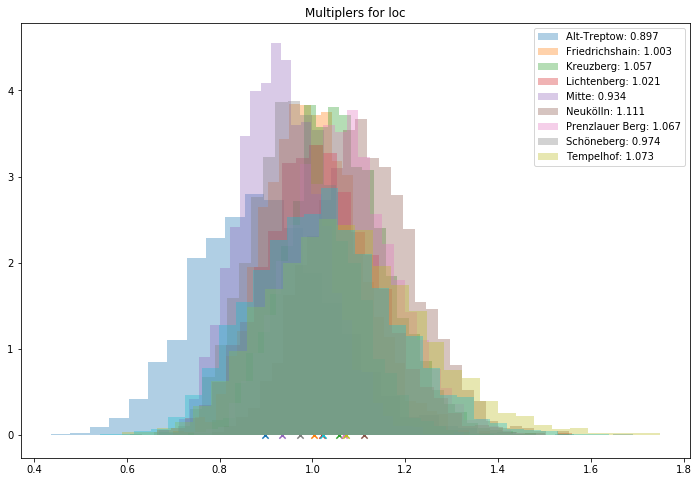

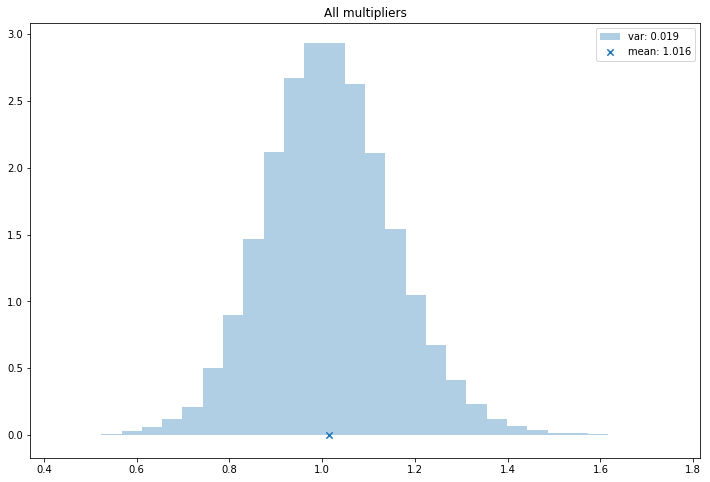

95% CI for all loc multipliers is: (0.7574819137404788, 1.3014189646324115)
___EFFECT OF EACH MULTIPLIER___


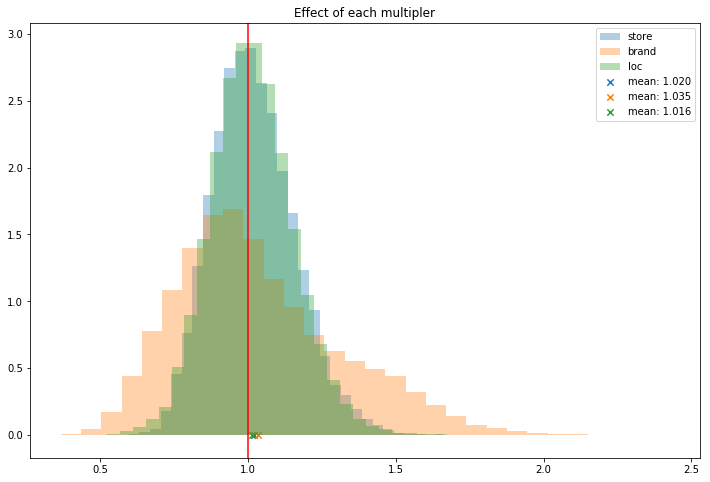

In [38]:
summarize_product('apple')

*********************************************************************************************************************
Summary of sampling results for banana:
*********************************************************************************************************************
___BASE PRICE___
95% CI for base price is: (0.9970525668086215, 1.9400200243993595)


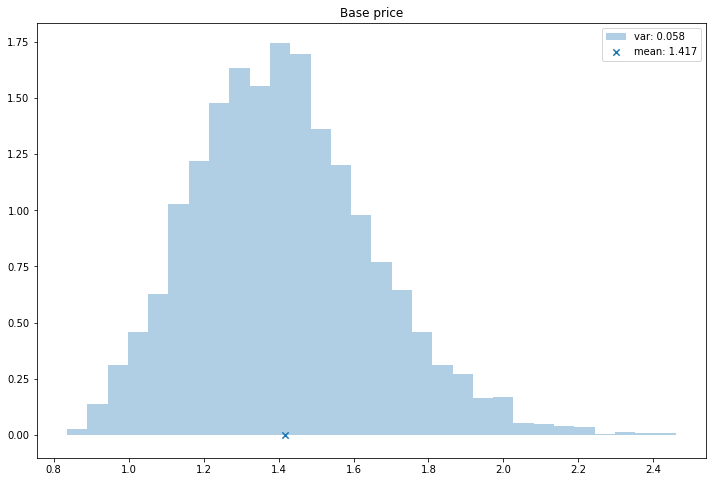

___STORE___


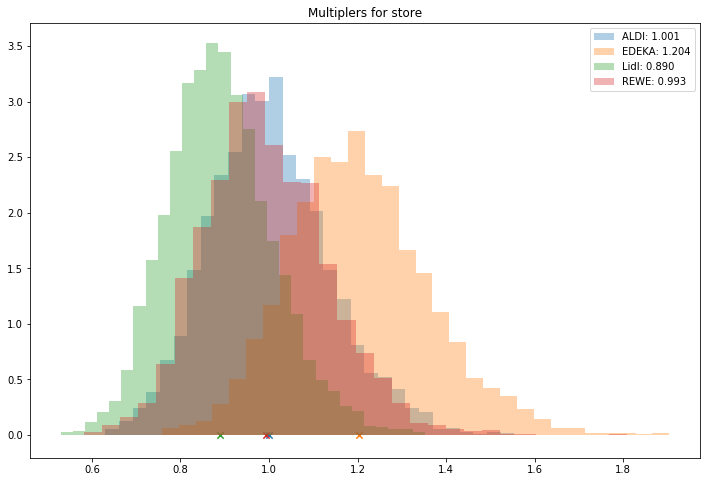

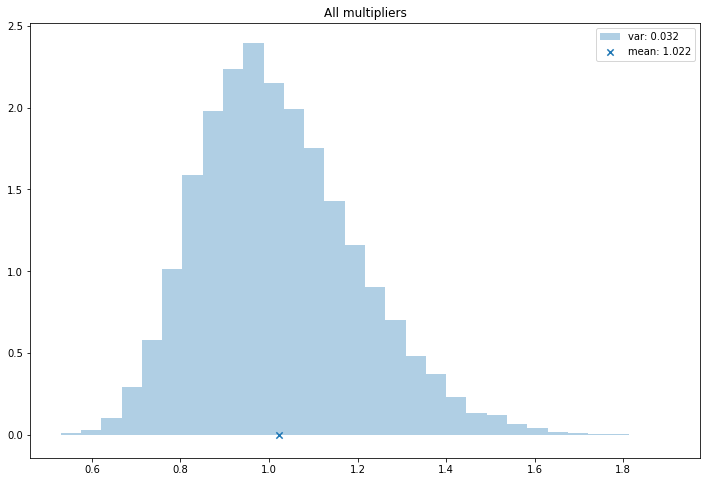

95% CI for all store multipliers is: (0.7238461747457196, 1.4166483791018452)
___BRAND___


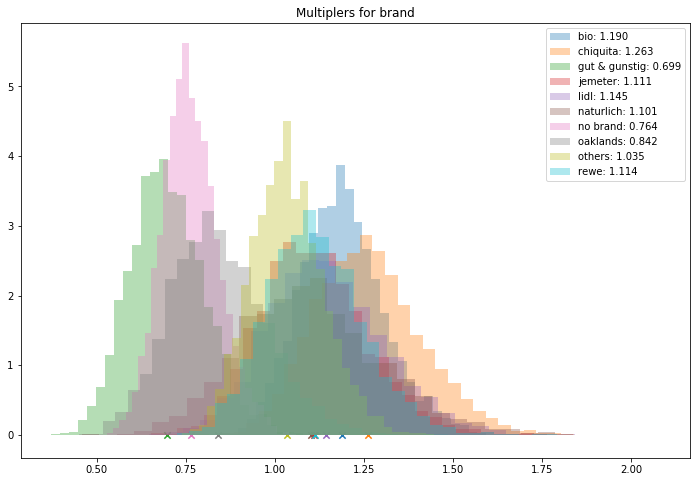

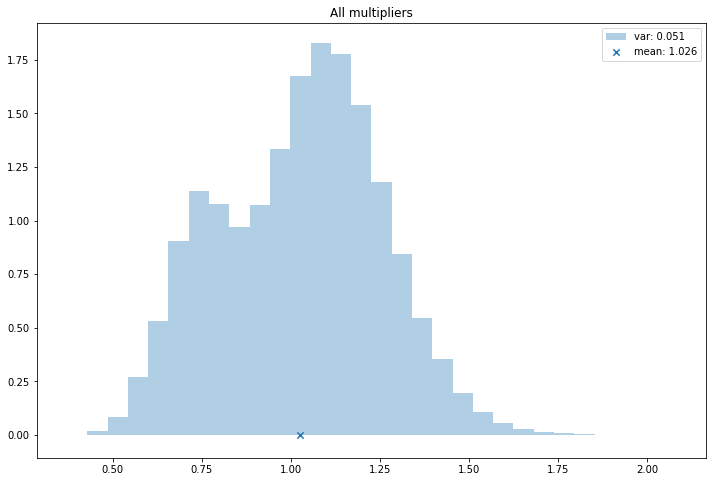

95% CI for all brand multipliers is: (0.6089062957444105, 1.4489402558089937)
___LOC___


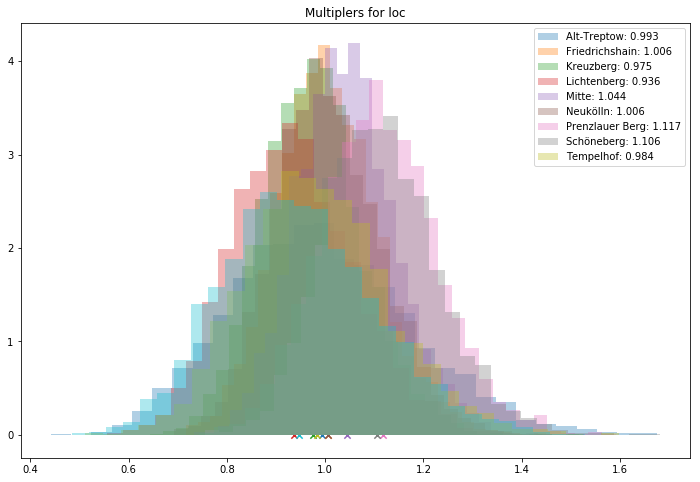

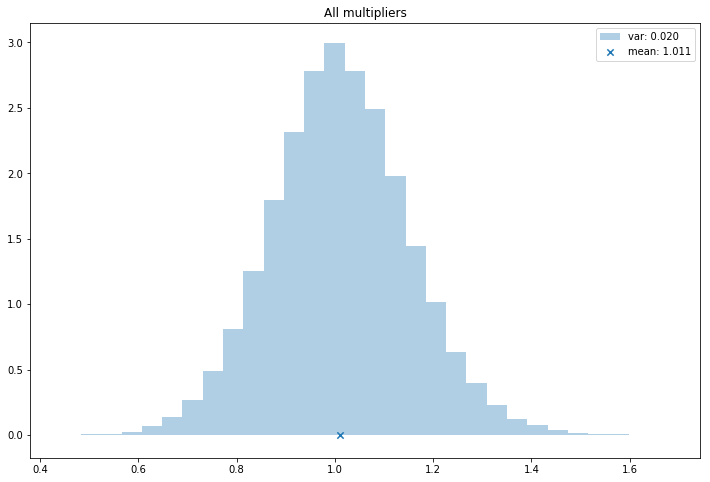

95% CI for all loc multipliers is: (0.7406554035012648, 1.2966671505504541)
___EFFECT OF EACH MULTIPLIER___


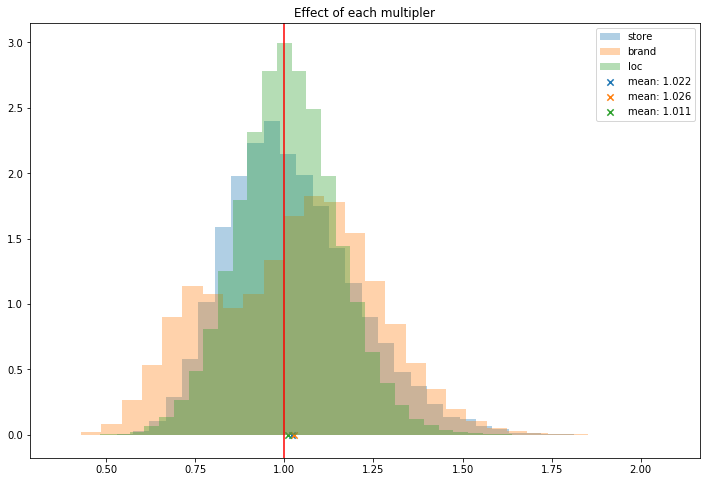

In [39]:
summarize_product('banana')

*********************************************************************************************************************
Summary of sampling results for tomato:
*********************************************************************************************************************
___BASE PRICE___
95% CI for base price is: (2.4262596414306254, 5.006562740357139)


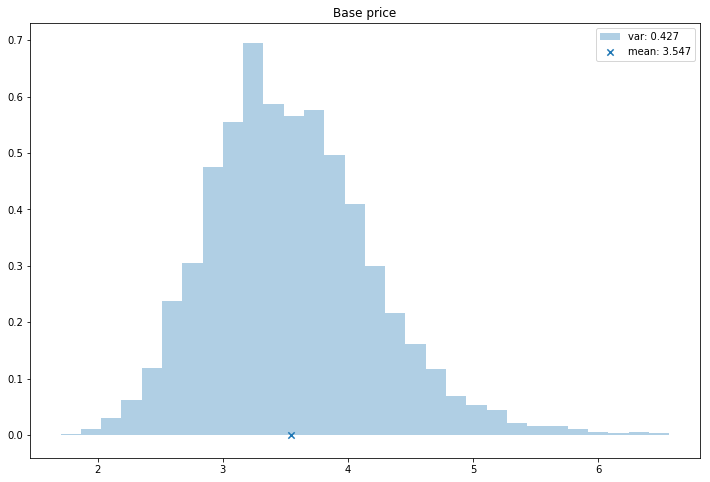

___STORE___


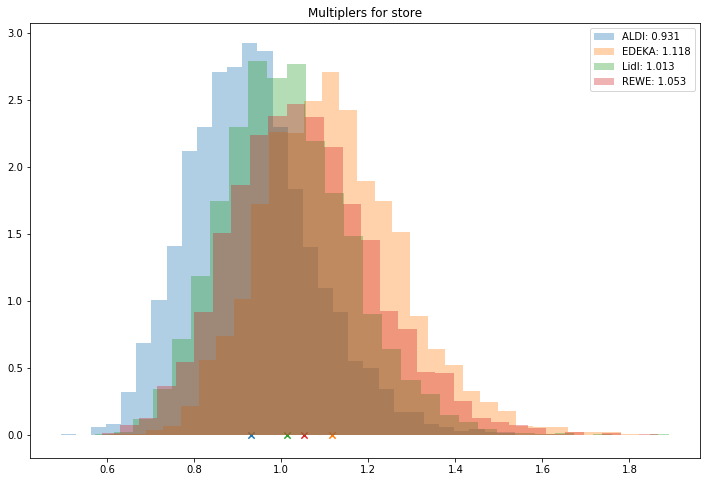

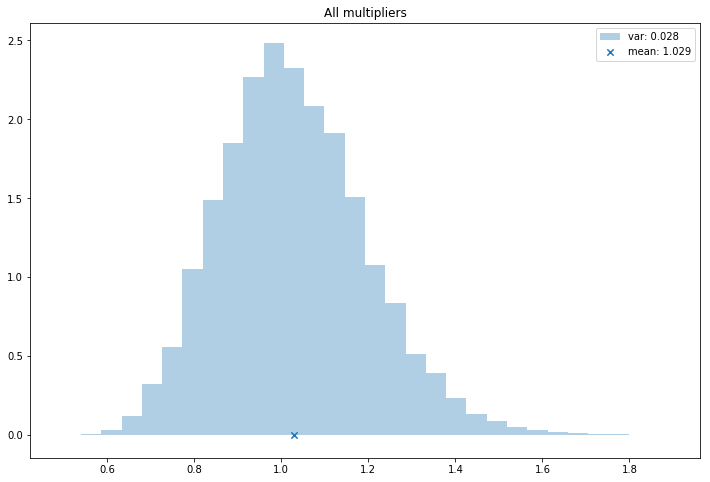

95% CI for all store multipliers is: (0.7308671525934058, 1.38790896806086)
___BRAND___


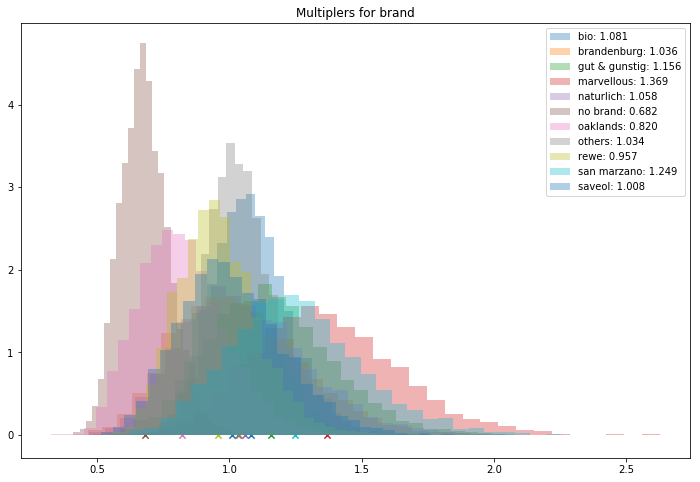

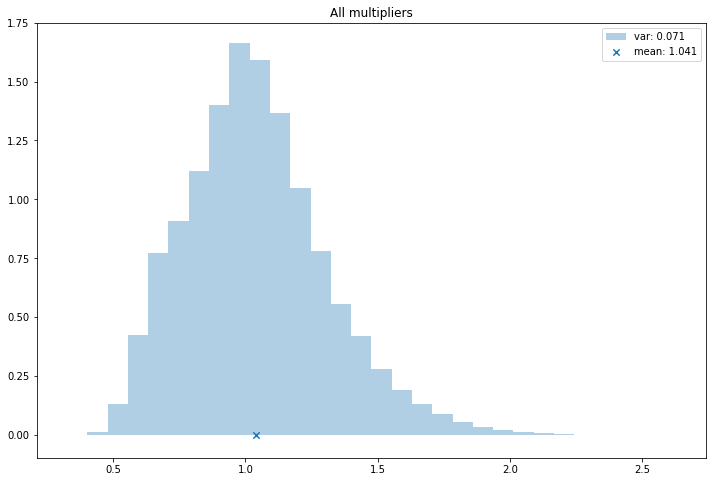

95% CI for all brand multipliers is: (0.5952251932560706, 1.6466881181614048)
___LOC___


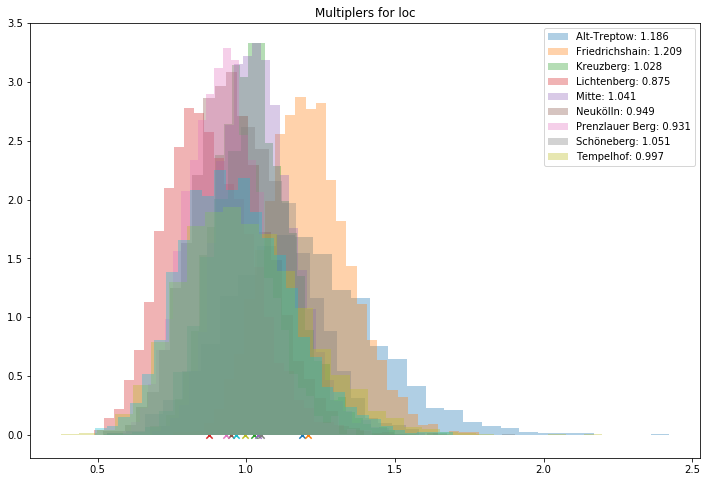

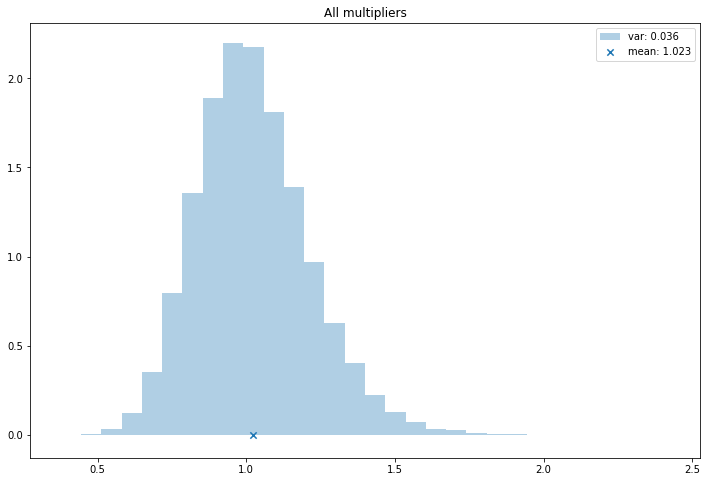

95% CI for all loc multipliers is: (0.6948476243175045, 1.4427309290818133)
___EFFECT OF EACH MULTIPLIER___


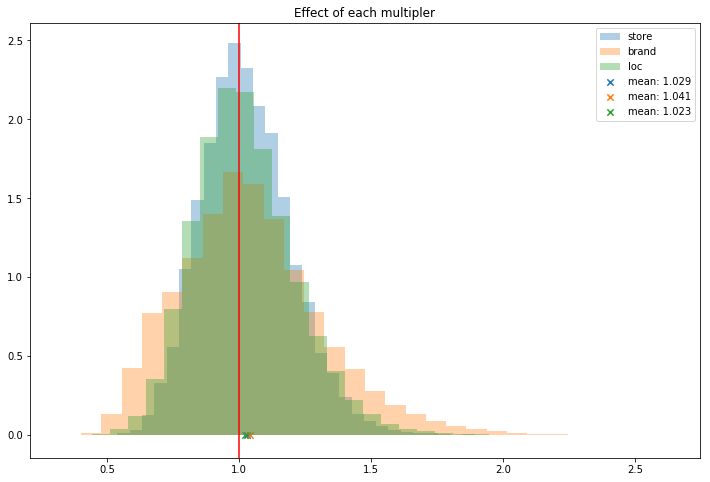

In [40]:
summarize_product('tomato')

*********************************************************************************************************************
Summary of sampling results for potato:
*********************************************************************************************************************
___BASE PRICE___
95% CI for base price is: (0.838164074351631, 1.673008383514746)


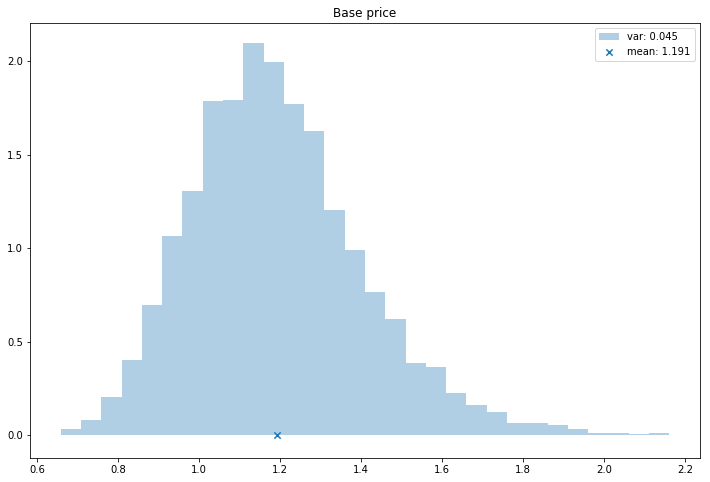

___STORE___


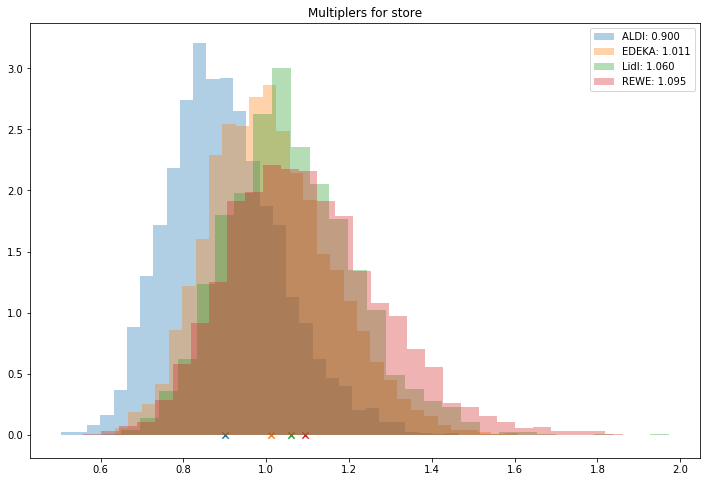

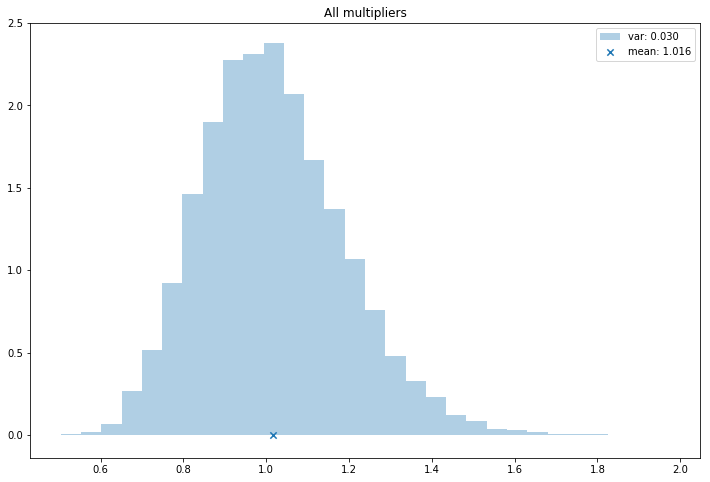

95% CI for all store multipliers is: (0.7186935072616542, 1.3909380787891528)
___BRAND___


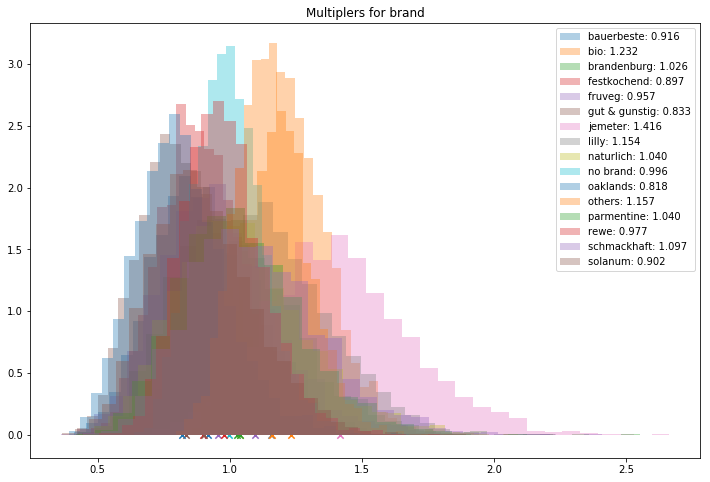

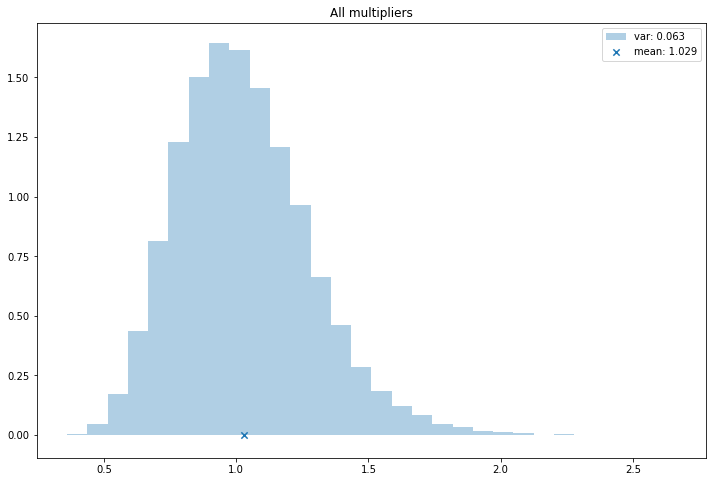

95% CI for all brand multipliers is: (0.6134524107500372, 1.5941438993309136)
___LOC___


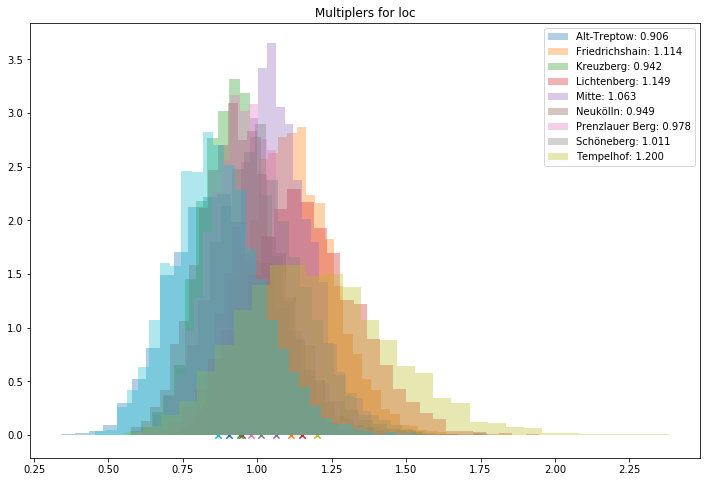

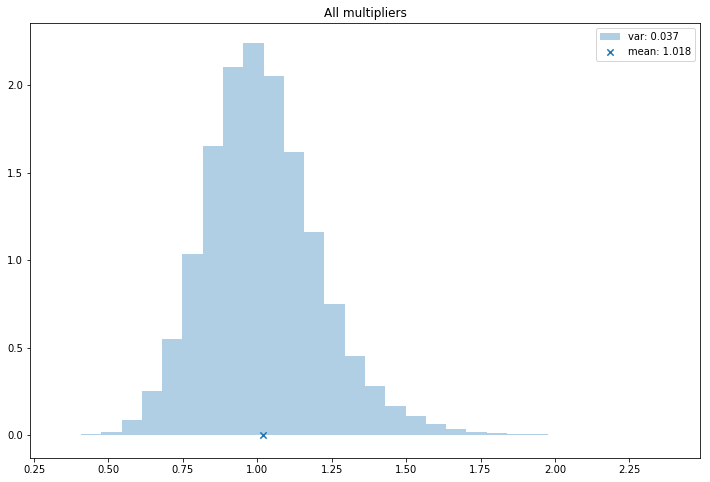

95% CI for all loc multipliers is: (0.6816751674486139, 1.448307855878289)
___EFFECT OF EACH MULTIPLIER___


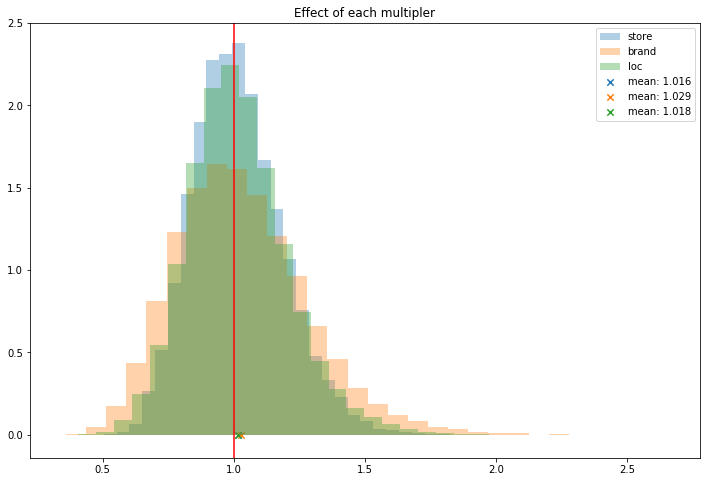

In [41]:
summarize_product('potato')

*********************************************************************************************************************
Summary of sampling results for flour:
*********************************************************************************************************************
___BASE PRICE___
95% CI for base price is: (0.5831118745893253, 1.1912545226573577)


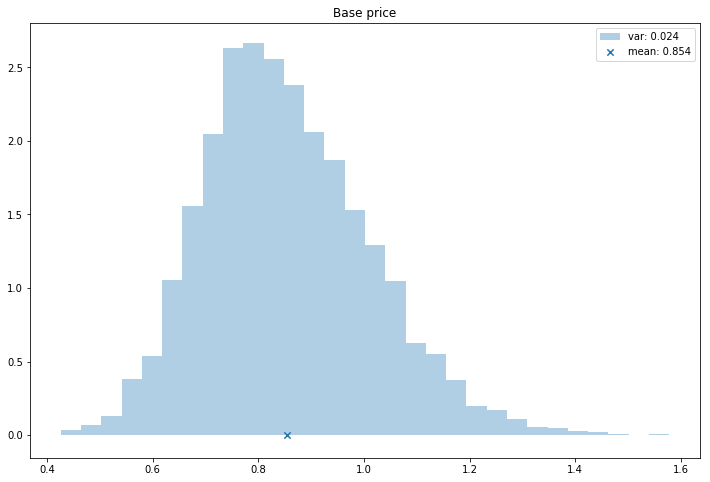

___STORE___


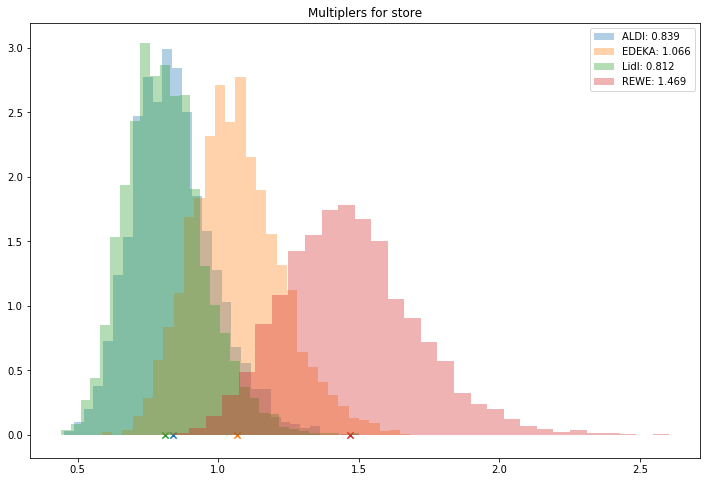

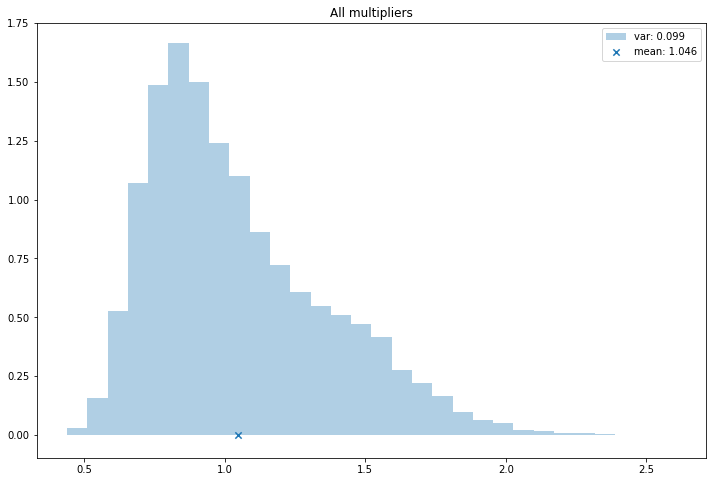

95% CI for all store multipliers is: (0.6152930084734411, 1.7755421145011892)
___BRAND___


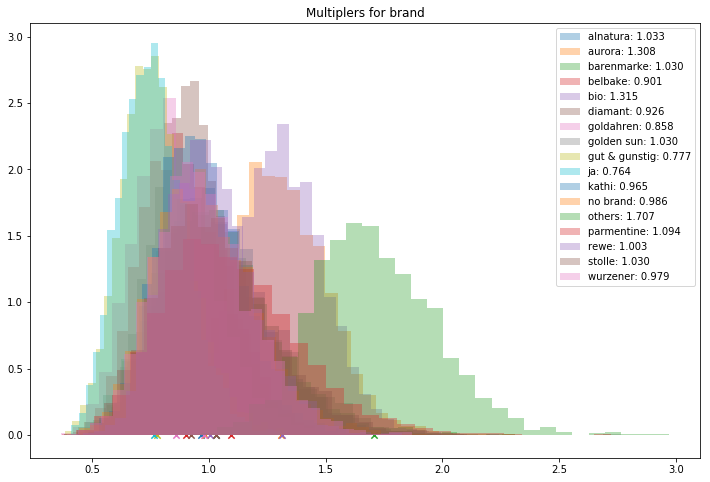

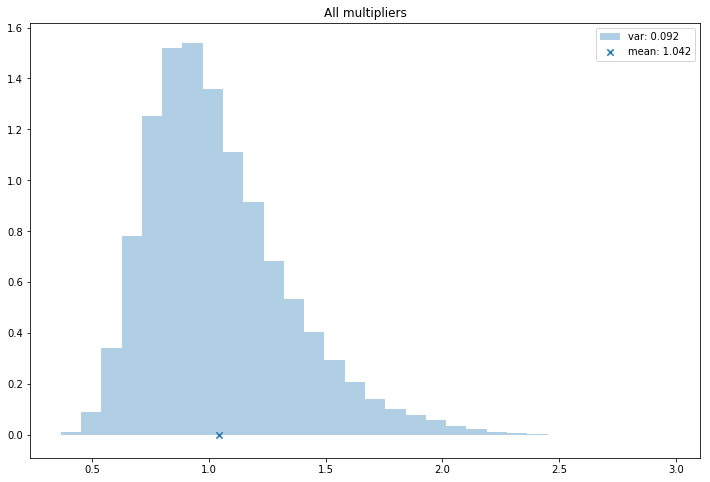

95% CI for all brand multipliers is: (0.596444025559863, 1.788845216032395)
___LOC___


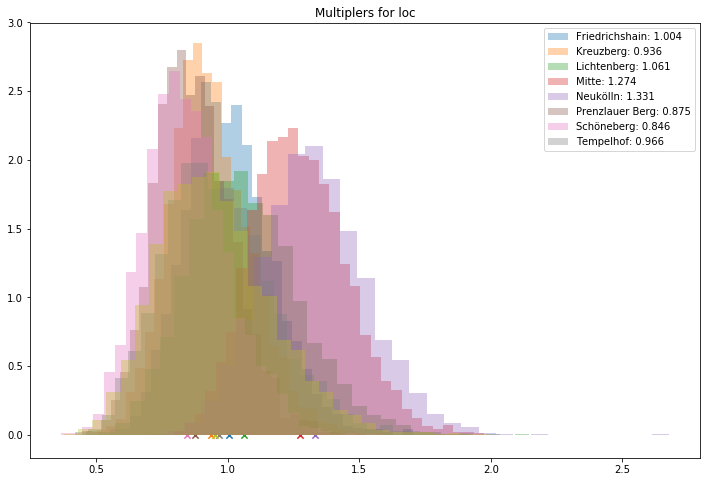

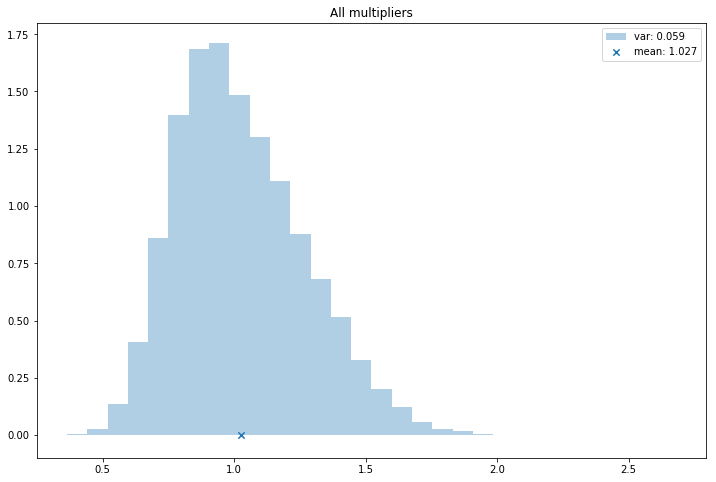

95% CI for all loc multipliers is: (0.63531347505153, 1.5576221141794606)
___EFFECT OF EACH MULTIPLIER___


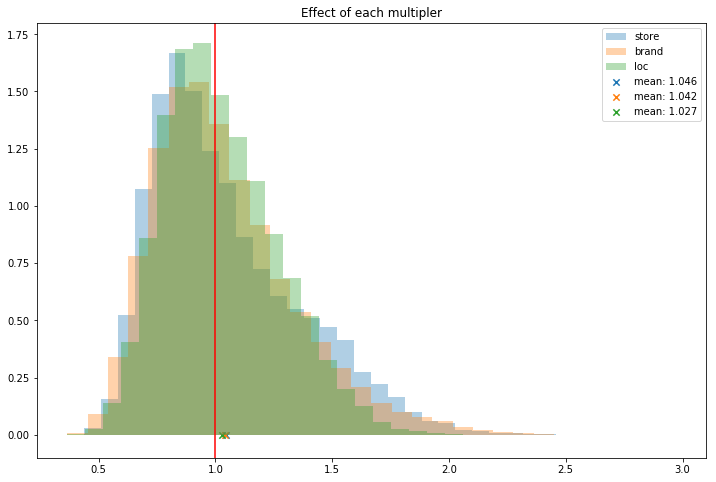

In [42]:
summarize_product('flour')

*********************************************************************************************************************
Summary of sampling results for rice:
*********************************************************************************************************************
___BASE PRICE___
95% CI for base price is: (1.4864130632399895, 2.8939850056077594)


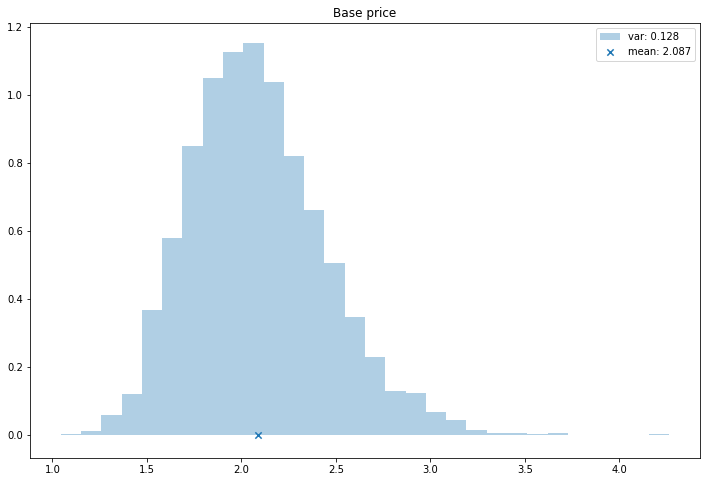

___STORE___


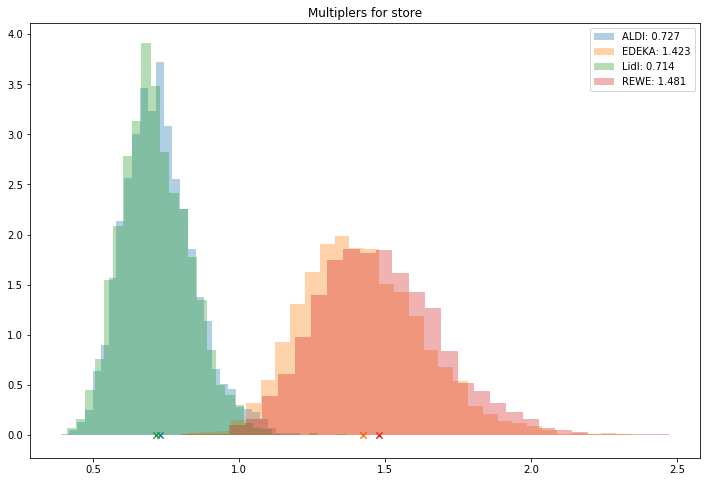

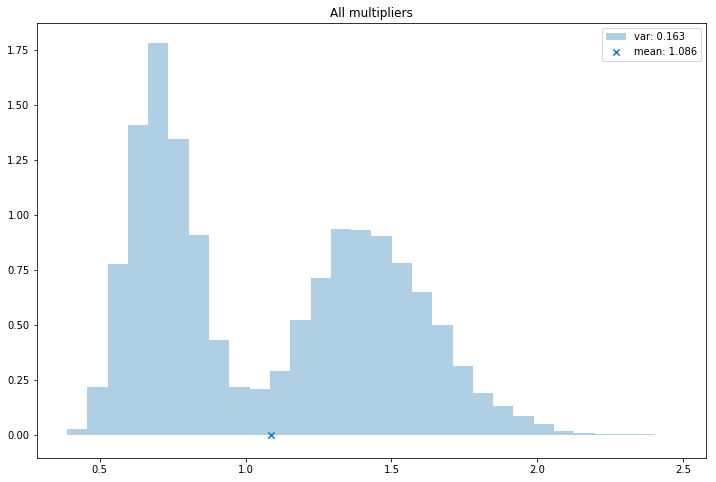

95% CI for all store multipliers is: (0.5445123783518916, 1.826395491347313)
___BRAND___


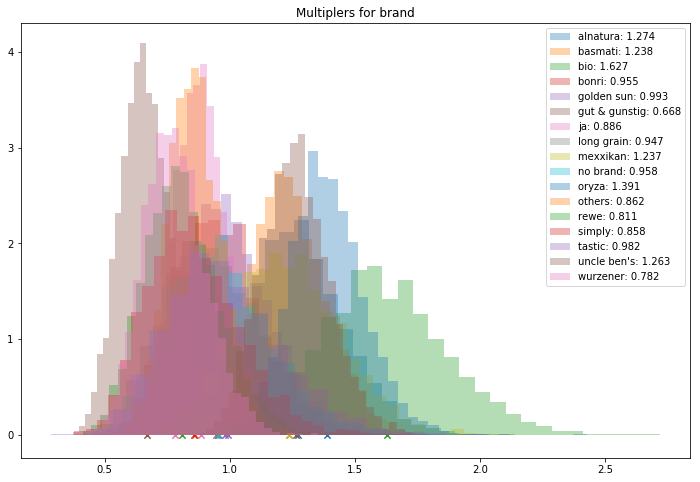

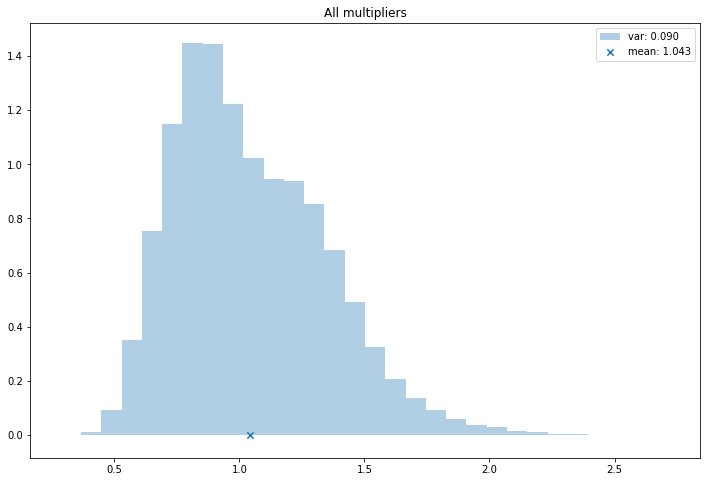

95% CI for all brand multipliers is: (0.5832312247763036, 1.7075880984621865)
___LOC___


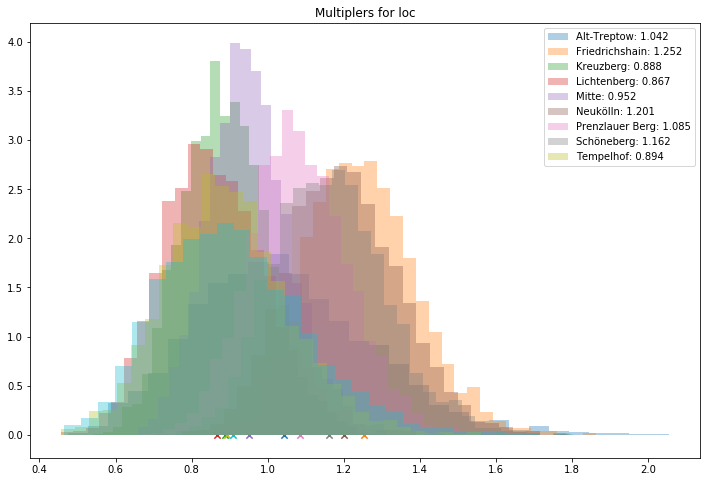

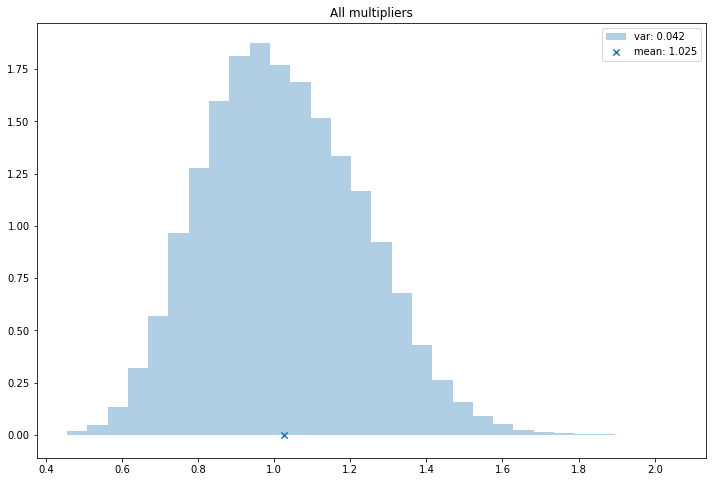

95% CI for all loc multipliers is: (0.662792710973297, 1.4435061925928947)
___EFFECT OF EACH MULTIPLIER___


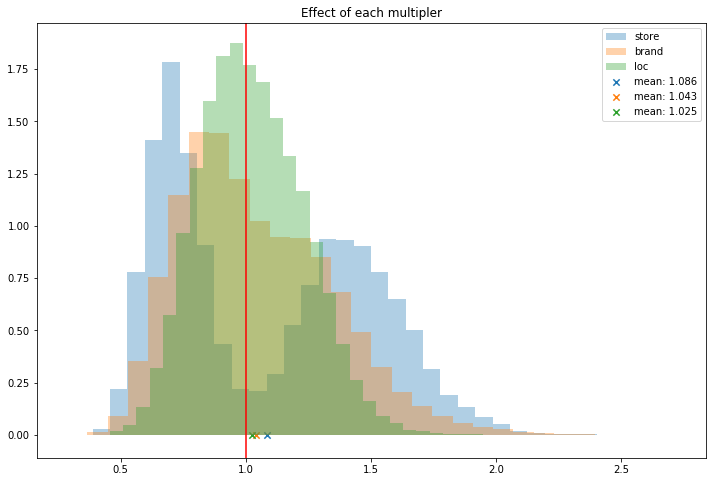

In [43]:
summarize_product('rice')

*********************************************************************************************************************
Summary of sampling results for milk:
*********************************************************************************************************************
___BASE PRICE___
95% CI for base price is: (0.7060920063694931, 1.3148793957678588)


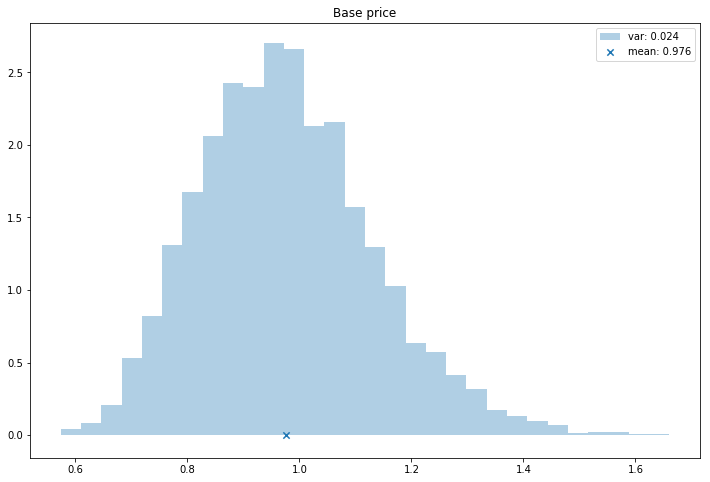

___STORE___


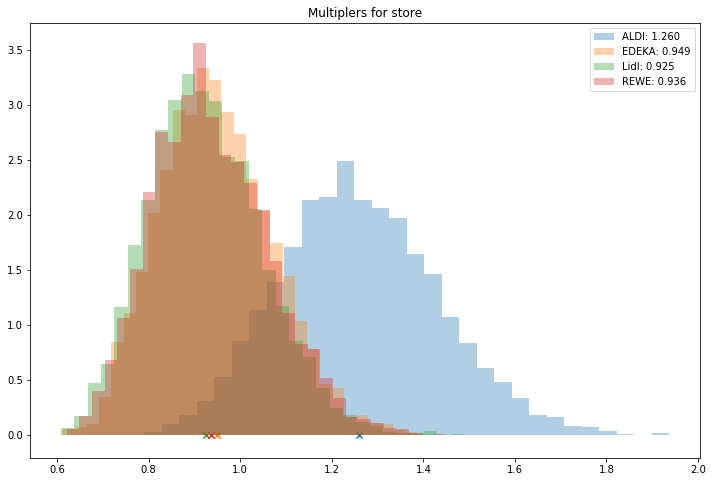

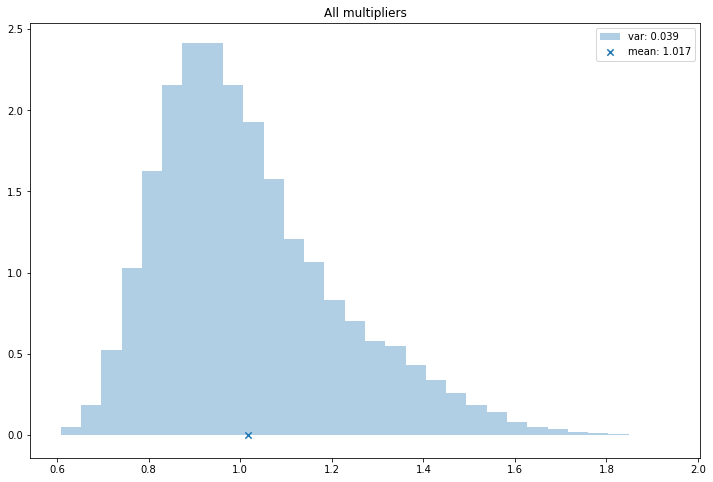

95% CI for all store multipliers is: (0.7292234660843496, 1.485085756617961)
___BRAND___


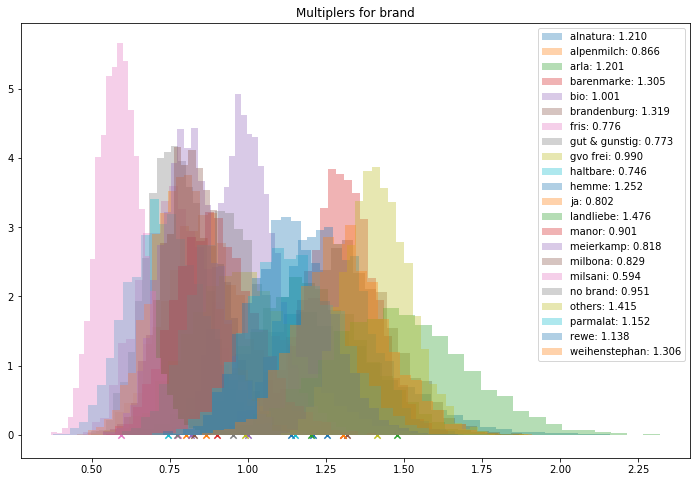

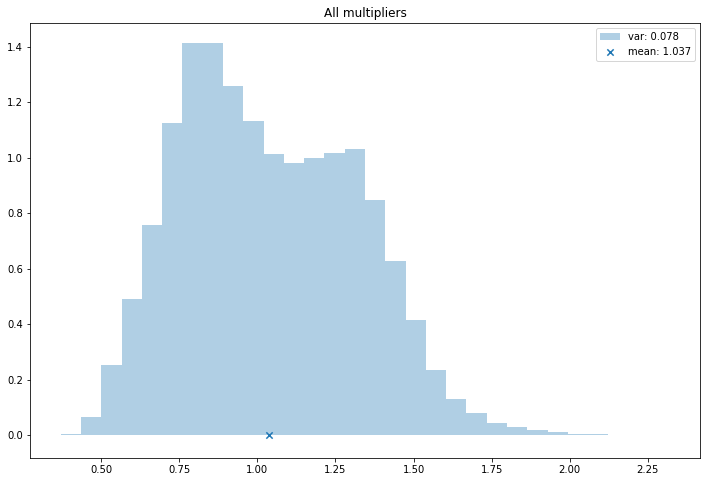

95% CI for all brand multipliers is: (0.5756919721722156, 1.5826798356870344)
___LOC___


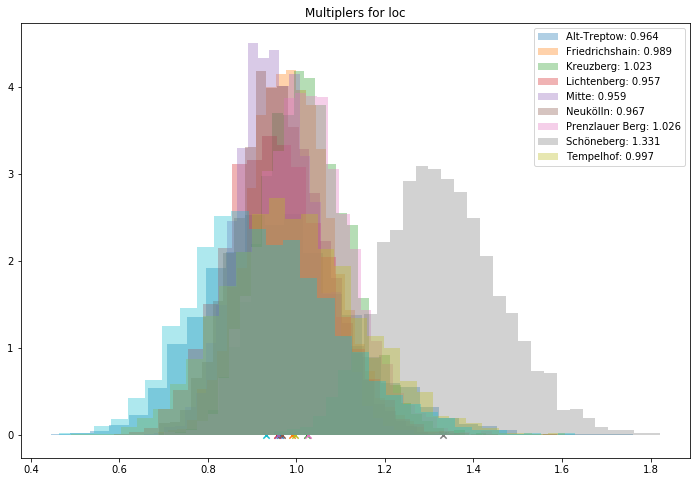

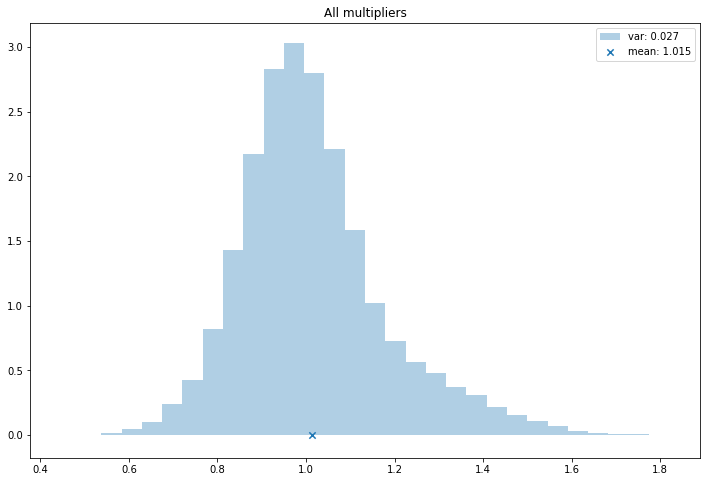

95% CI for all loc multipliers is: (0.7401771250702632, 1.4226896454056701)
___EFFECT OF EACH MULTIPLIER___


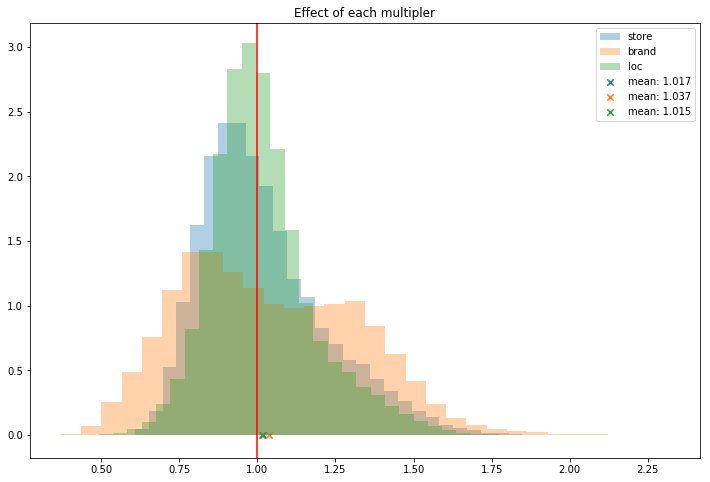

In [44]:
summarize_product('milk')

*********************************************************************************************************************
Summary of sampling results for butter:
*********************************************************************************************************************
___BASE PRICE___
95% CI for base price is: (2.736714406262176, 5.3345775526096775)


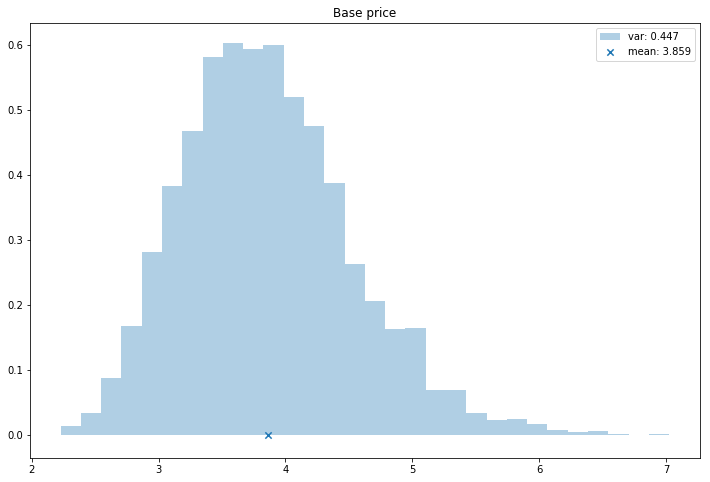

___STORE___


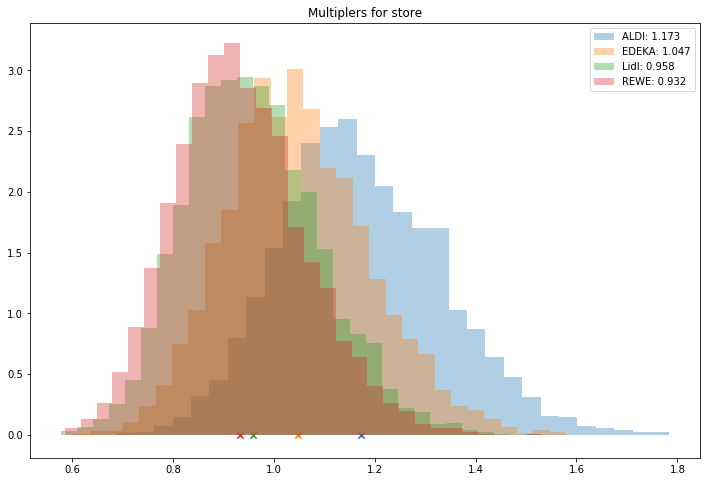

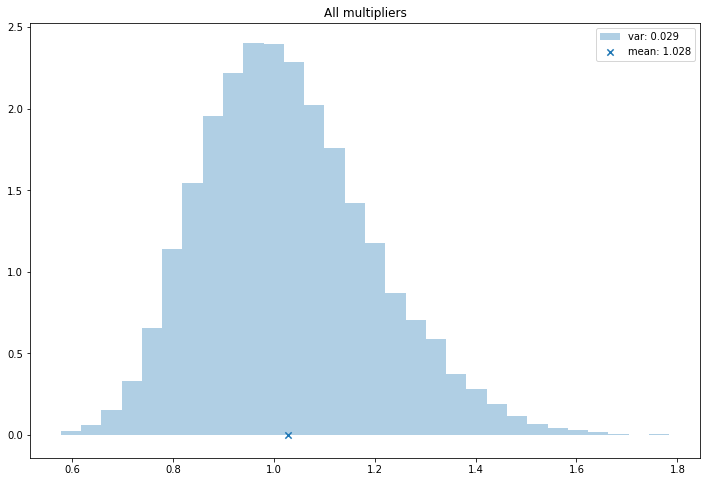

95% CI for all store multipliers is: (0.7426581729950101, 1.4013709717930007)
___BRAND___


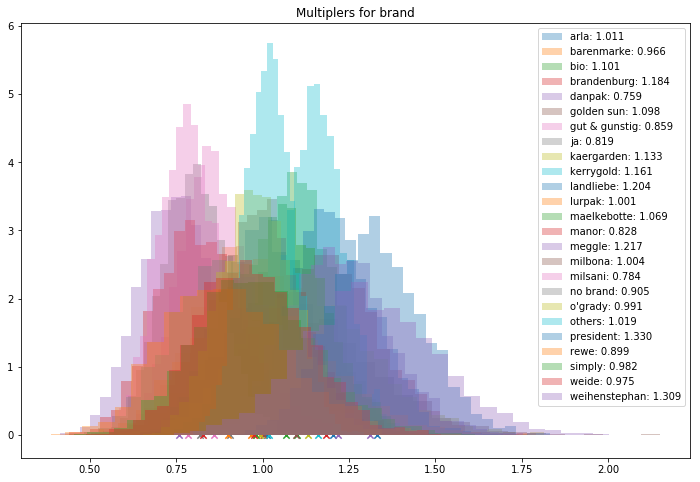

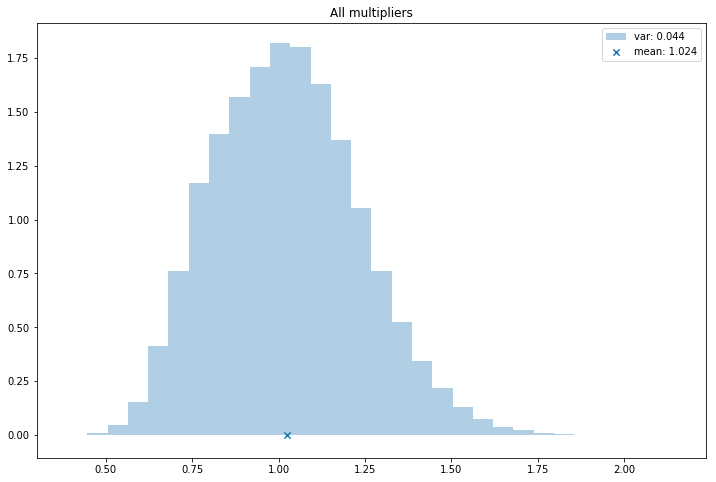

95% CI for all brand multipliers is: (0.6591677080124306, 1.4633193045587032)
___LOC___


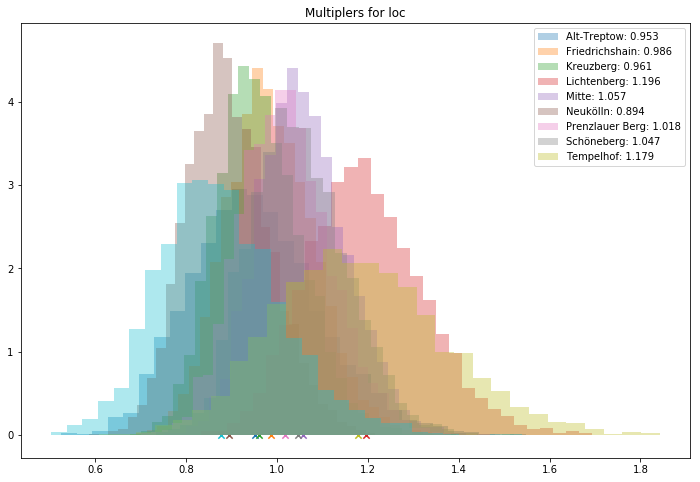

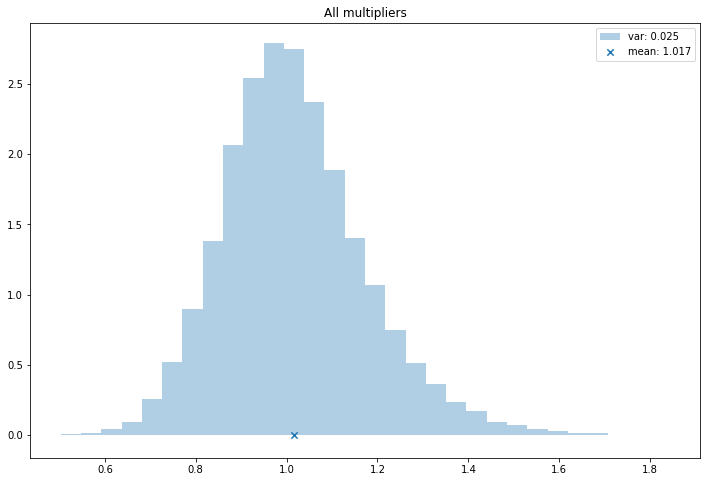

95% CI for all loc multipliers is: (0.7412955510526535, 1.3704988394851056)
___EFFECT OF EACH MULTIPLIER___


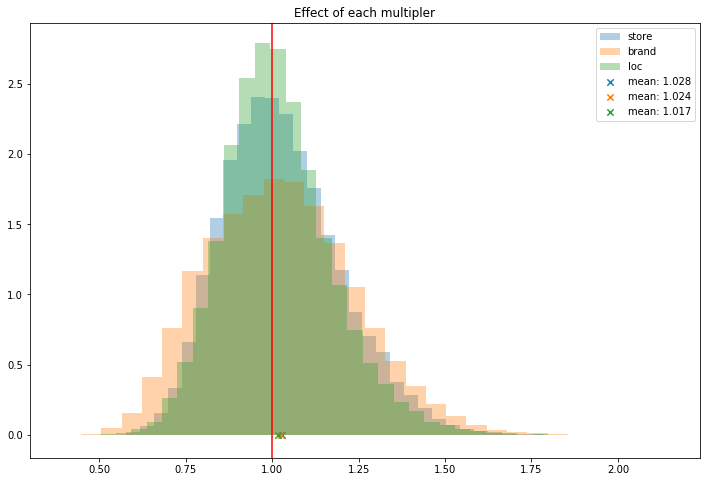

In [45]:
summarize_product('butter')

*********************************************************************************************************************
Summary of sampling results for egg:
*********************************************************************************************************************
___BASE PRICE___
95% CI for base price is: (1.60981148624481, 3.090850290003391)


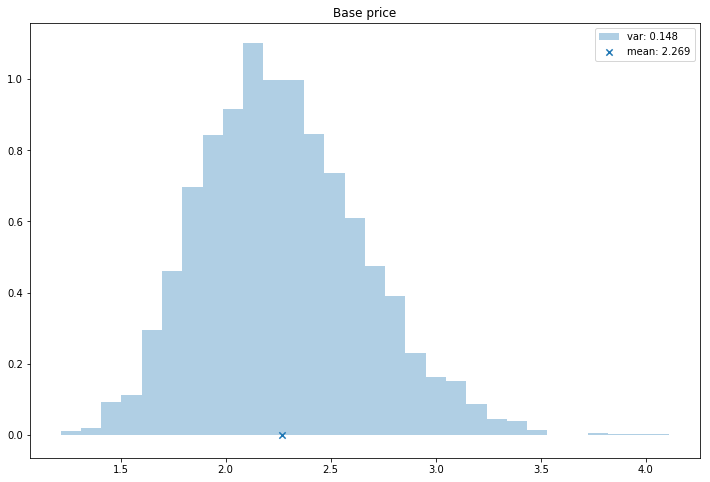

___STORE___


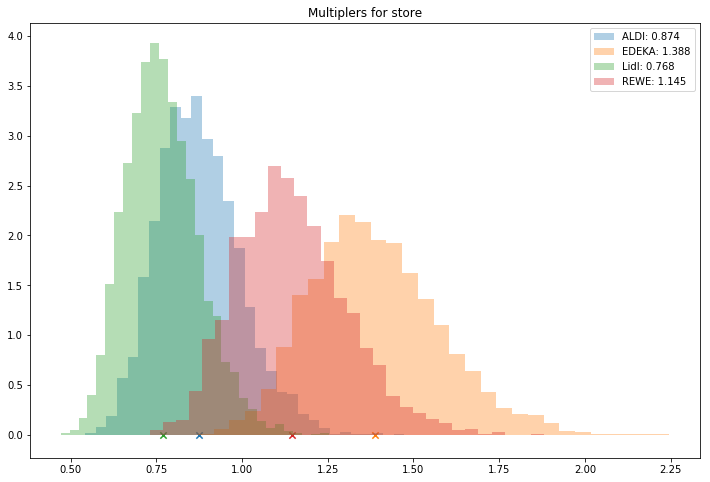

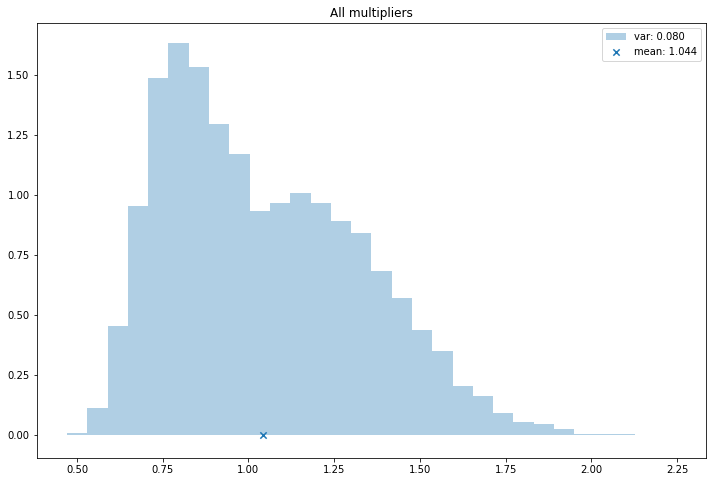

95% CI for all store multipliers is: (0.6337108235147981, 1.644243016260248)
___BRAND___


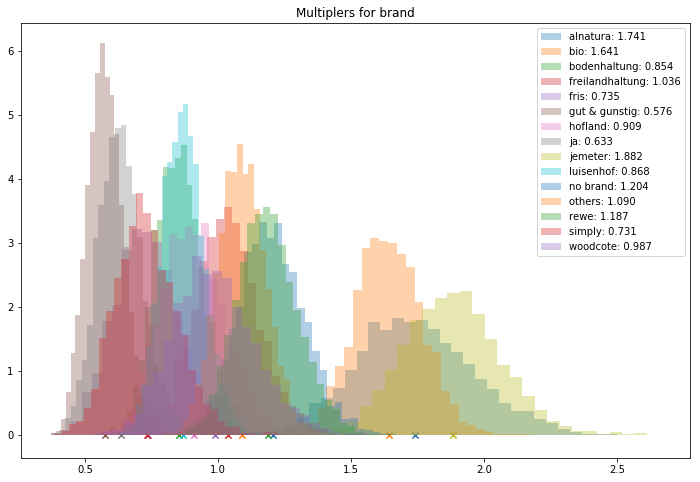

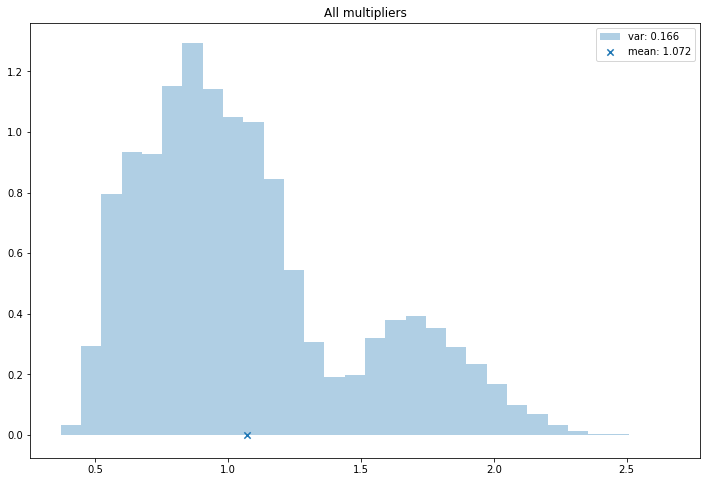

95% CI for all brand multipliers is: (0.5235673363160152, 1.9987591831492386)
___LOC___


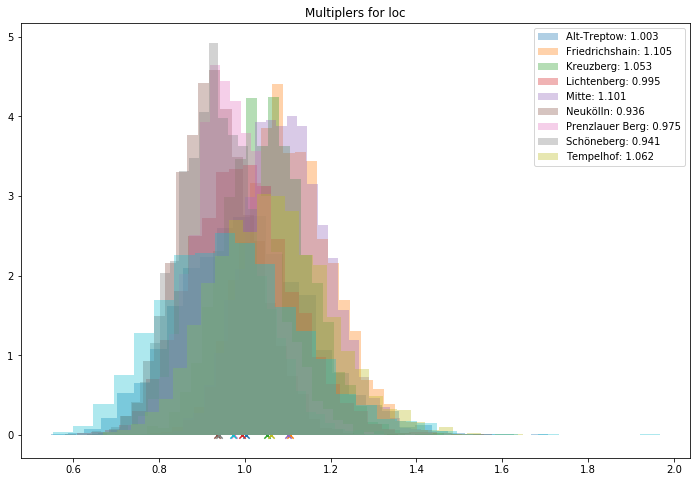

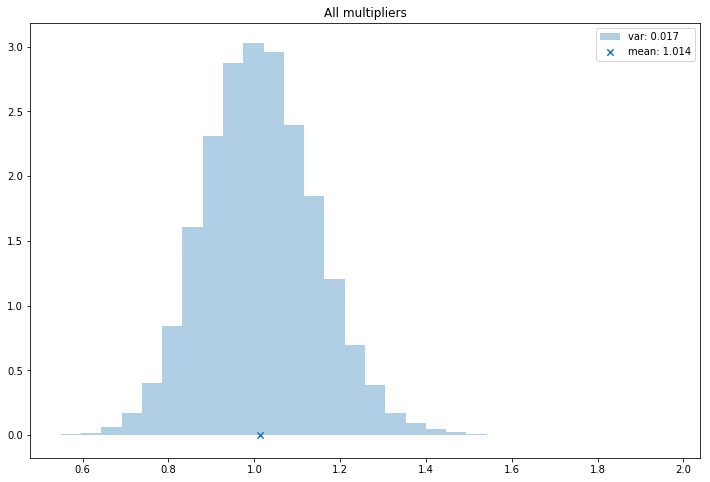

95% CI for all loc multipliers is: (0.7741560867807881, 1.2795272538289453)
___EFFECT OF EACH MULTIPLIER___


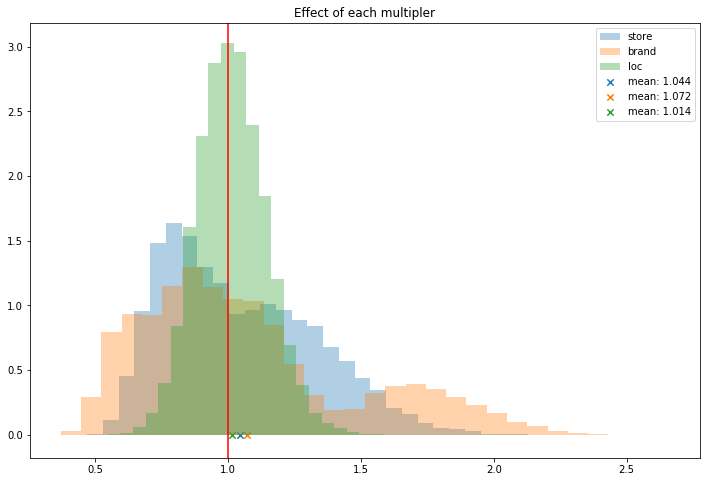

In [46]:
summarize_product('egg')

*********************************************************************************************************************
Summary of sampling results for chicken:
*********************************************************************************************************************
___BASE PRICE___
95% CI for base price is: (5.91213069828724, 11.817601673927797)


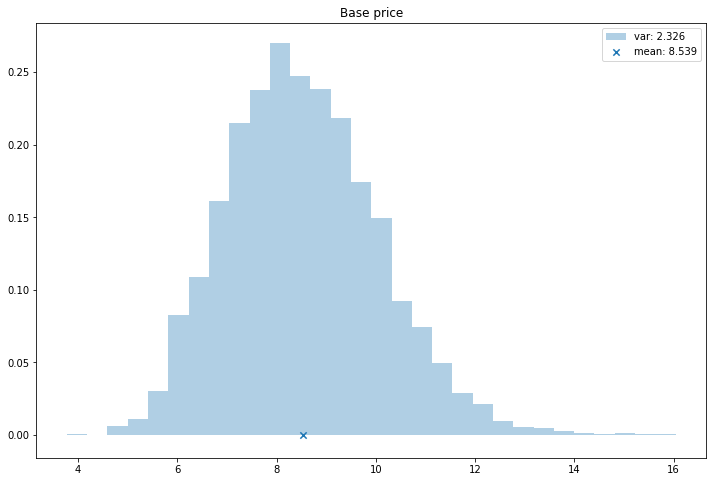

___STORE___


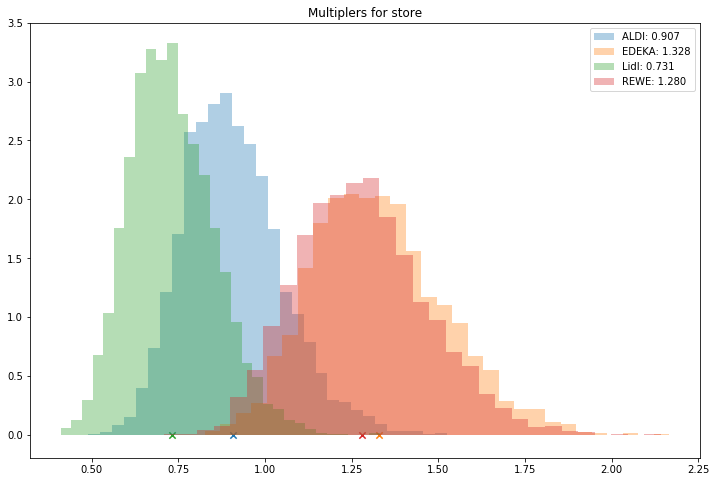

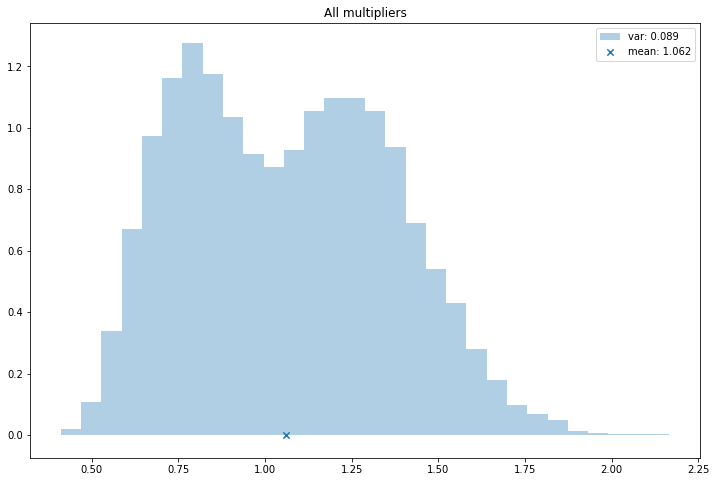

95% CI for all store multipliers is: (0.5806993124094095, 1.6387830938189138)
___BRAND___


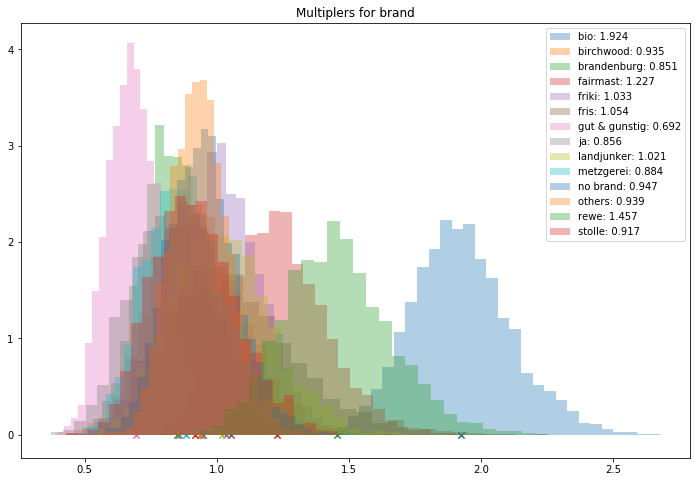

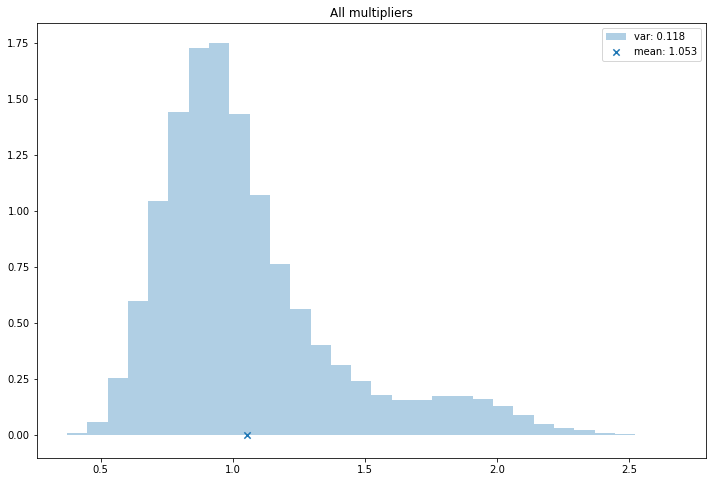

95% CI for all brand multipliers is: (0.6036790075941526, 1.9904899845592667)
___LOC___


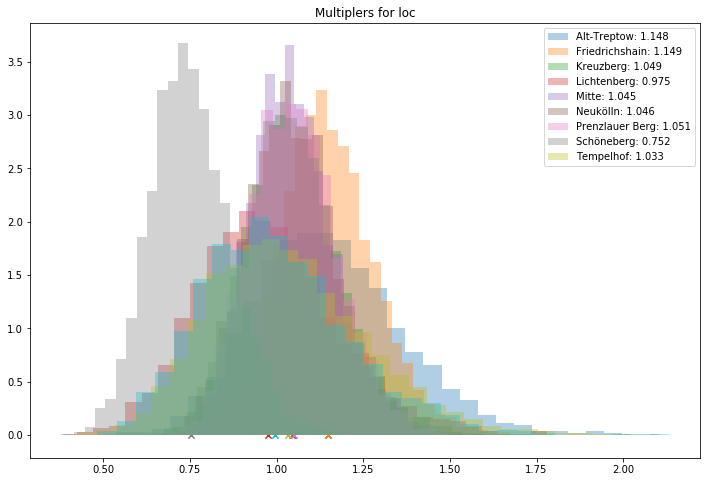

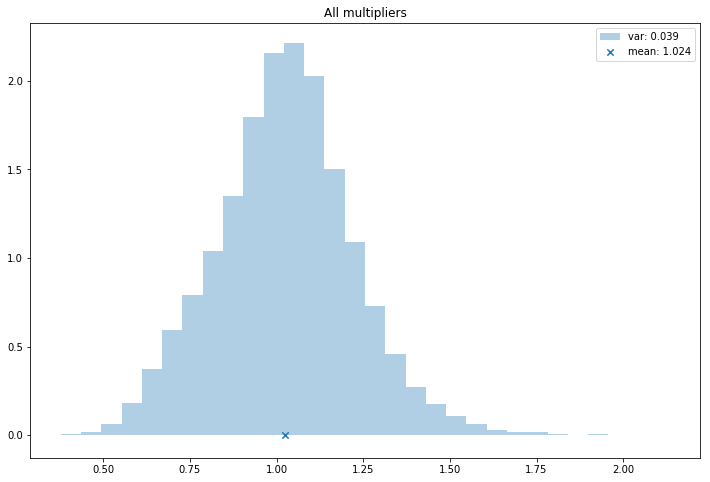

95% CI for all loc multipliers is: (0.6418006086656716, 1.4301842382484182)
___EFFECT OF EACH MULTIPLIER___


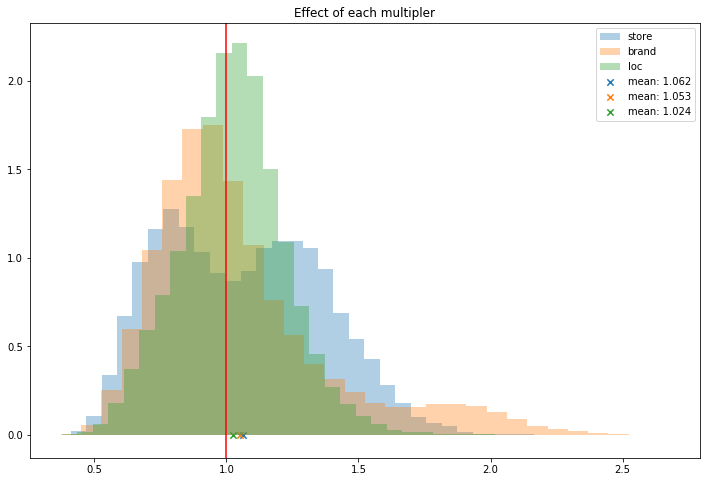

In [47]:
summarize_product('chicken')

In [5]:
model_spec_2 = """

data {

//Number of store
    int<lower=1> S;
//Number of product brand
    int<lower=1> B;
//Number of location
    int<lower=1> L;
//Number of product    
    int<lower=1> P;
//Number of datapoint
    int<lower=1> N;
    
//A vector of 0/1 in each entry expressing which product, store, brand, or location the datapoint is
    vector<lower=0>[P] product[N];
    vector<lower=0>[S] store[N];
    vector<lower=0>[B] brand[N];
    vector<lower=0>[L] loc[N];
    
//Price of the datapoint
    real<lower=0> price[N];
}

parameters {

//Vector of size P of base price of each product
    row_vector<lower=0>[P] base;
//Vector of size S for each store multiplier
    row_vector<lower=0>[S] mul_S;
//Vector of size B for each brand multiplier
    row_vector<lower=0>[B] mul_B;
//Vector of size L for each location multiplier
    row_vector<lower=0>[L] mul_L;
}

model {
    
//Sampling each base price from a broad Cauchy
    for (p in 1:P){
        base[p] ~ cauchy(0,1);
    }
//Sampling each multipler from a lognormal, with mean and
//variance chosen such that it's centered around 1
    for (s in 1:S){
        mul_S[s] ~ lognormal(0,0.25);
    }
    
    for (b in 1:B){
        mul_B[b] ~ lognormal(0,0.25);
    }
    
    for (l in 1:L){
        mul_L[l] ~ lognormal(0,0.25);
    }
//For each datapoint, sampling the price from a truncated normal centered 
//around the product of the base price with all multiplier for store, brand, location
    for(i in 1:N) {
        price[i] ~ normal(((base*product[i])*(mul_S*store[i])*(mul_B*brand[i])*(mul_L*loc[i])), 1); 
    }
}

"""
model_2 = pystan.StanModel(model_code=model_spec_2)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_03f3dfce78a7d84c773ca91cd8948a85 NOW.
/Users/ash/anaconda3/lib/python3.6/site-packages/Cython/Compiler/Main.py:367: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /var/folders/kg/zv3bhpmx19s5f8hsk7h4_wnc0000gn/T/tmp18htifeg/stanfit4anon_model_03f3dfce78a7d84c773ca91cd8948a85_6202581810921793125.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)


In [6]:
def brand_no_brand(brand): 
    if brand != 'no brand':
        brand = 'brand'
    else: 
        brand = 'no brand'
    return brand

data_2 = data

def produce_stan_data_2(data=data_2): 
    data['brand'] = data['brand'].apply(brand_no_brand)
    processed = data
    processed = processed.sample(frac=1.0)
    
    product = pd.get_dummies(processed['product'])
    name_p = product.columns
    product = np.array(product, dtype=int)
    
    store = pd.get_dummies(processed['store_brand'])
    name_s = store.columns
    store = np.array(store, dtype=int)
    
    brand = pd.get_dummies(processed['brand'])
    name_b = brand.columns
    brand = np.array(brand, dtype=int)
    
    loc = pd.get_dummies(processed['neighborhood'])
    name_l = loc.columns
    loc = np.array(loc, dtype=int)
    
    price = np.array(processed['price'], dtype=float)
    
    data_dict = {
        'P': product.shape[1],
        'S': store.shape[1],
        'B': brand.shape[1],
        'L': loc.shape[1],
        'N': store.shape[0],
        
        'product': product,
        'store': store, 
        'brand': brand, 
        'loc': loc, 
        
        'price': price
    }
    
    name_dict = {
        'product': name_p,
        'store': name_s,
        'brand': name_b,
        'loc': name_l
    }
    return data_dict, name_dict

In [7]:
def plot_multiplier_variance_2(results, name, what): 
    if what == 'store': 
        what_ = 'mul_S'
    elif what == 'product': 
        what_ = 'base'
    elif what == 'brand':
        what_ = 'mul_B'
    else: 
        what_ = 'mul_L'
    mul = results[what_]
    plt.figure(figsize=(12,8))
    for _ in range(mul.shape[1]):
        plt.hist(mul[:,_], alpha=0.35, bins=30, density=True, label=str(name[what][_])+': {0:.3f}'.format(mul[:,_].mean()))
        plt.scatter(mul[:,_].mean(),0, marker='x', s=40)
    plt.legend()
    plt.title('Multiplers for {}'.format(what))
    mul = mul.reshape(-1,1)
    plt.figure(figsize=(12,8))
    plt.hist(mul, alpha=0.35, bins=30, density=True, label='var: {0:.3f}'.format(mul.var()))
    plt.scatter(mul.mean(), 0, marker='x', s=40, label='mean: {0:.3f}'.format(mul.mean()))
    plt.title('All multipliers')
    plt.legend()
    plt.show()
    print('95% CI for all {} multipliers is:'.format(what), (np.percentile(mul,2.5),np.percentile(mul,97.5)))
    return mul
    
def summarize_everything(results, name):
    
    print('***'*39)
    print('Summary of sampling results')
    print('***'*39)
    
    dumb = []
    for _ in ['product', 'store', 'brand', 'loc']:
        print('___{}___'.format(_.upper()))
        dumb.append(plot_multiplier_variance_2(results,name,_))
        
    print('___EFFECT OF EACH MULTIPLIER___')
    plt.figure(figsize=(12,8))
    for i in range(len(dumb)-1):
        dumb_2 = ['store', 'brand', 'loc']
        plt.hist(dumb[i+1], alpha=0.35, bins=30, density=True, label='{0}, var: {1:.3f}'.format(dumb_2[i],dumb[i+1].var()))
        plt.scatter(dumb[i+1].mean(), 0, marker='x', s=40, label='mean: {0:.3f}'.format(dumb[i+1].mean()))
    plt.axvline(x=1, color='r')
    plt.legend()
    plt.title('Effect of each multipler')
    plt.show()


In [8]:
stan_data_2, name = produce_stan_data_2()
results = model_2.sampling(data=stan_data_2)

In [9]:
results

Inference for Stan model: anon_model_03f3dfce78a7d84c773ca91cd8948a85.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

            mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
base[1]     1.65    0.01   0.33    1.1   1.42   1.62   1.85   2.44    813    1.0
base[2]      1.1  7.9e-3   0.23   0.73   0.94   1.08   1.24   1.64    839    1.0
base[3]     2.87    0.02   0.58   1.93   2.46   2.81   3.21   4.23    790    1.0
base[4]      7.6    0.05   1.52   5.12   6.52   7.47   8.49  11.21    794    1.0
base[5]     1.94    0.01   0.39    1.3   1.67   1.91   2.17   2.86    815    1.0
base[6]     0.78  5.5e-3   0.17   0.51   0.66   0.76   0.88   1.17    913    1.0
base[7]     0.72  5.1e-3   0.15   0.47   0.61    0.7   0.81   1.06    882    1.0
base[8]     0.96  6.7e-3    0.2   0.63   0.82   0.94   1.07   1.44    899    1.0
base[9]     1.83    0.01   0.37   1.23   1.56   1.79   2.04   2.69    807    1.0
b

*********************************************************************************************************************
Summary of sampling results
*********************************************************************************************************************
___PRODUCT___


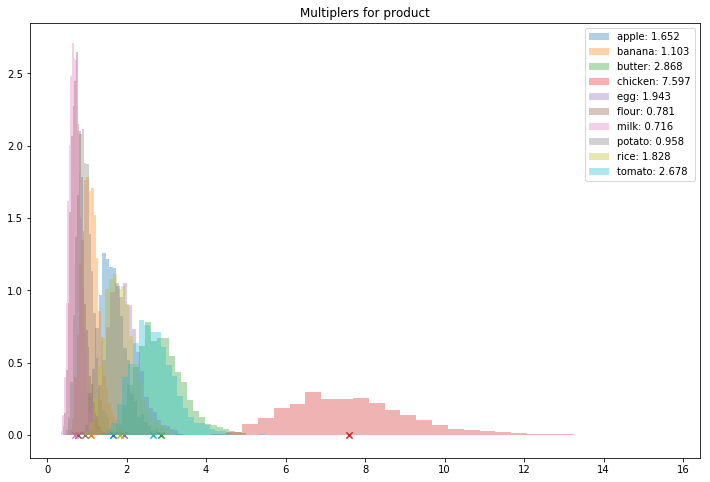

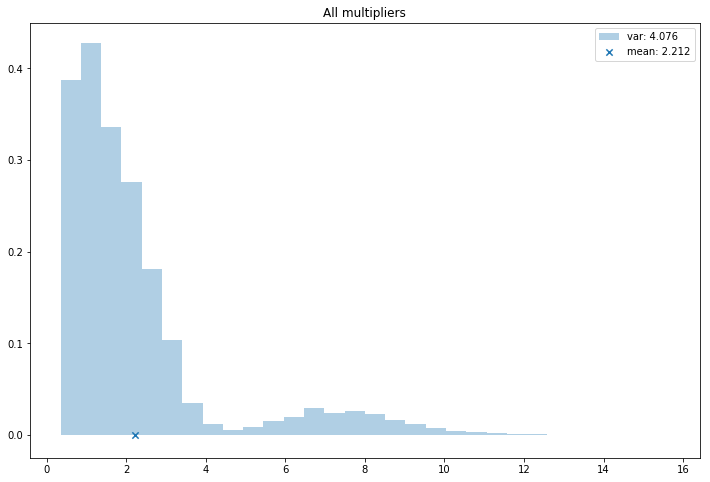

95% CI for all product multipliers is: (0.5685838622991908, 8.491244247621635)
___STORE___


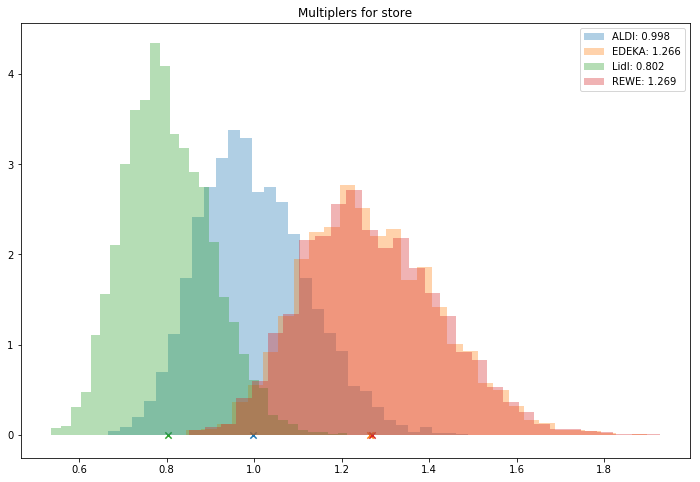

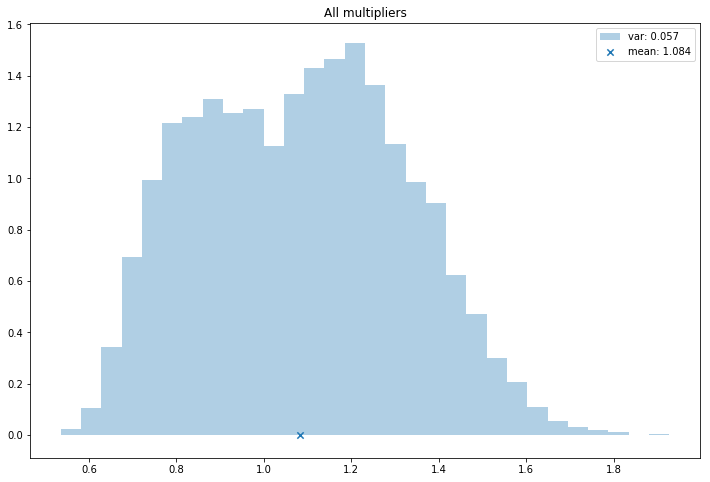

95% CI for all store multipliers is: (0.6809820512508967, 1.5386018663630774)
___BRAND___


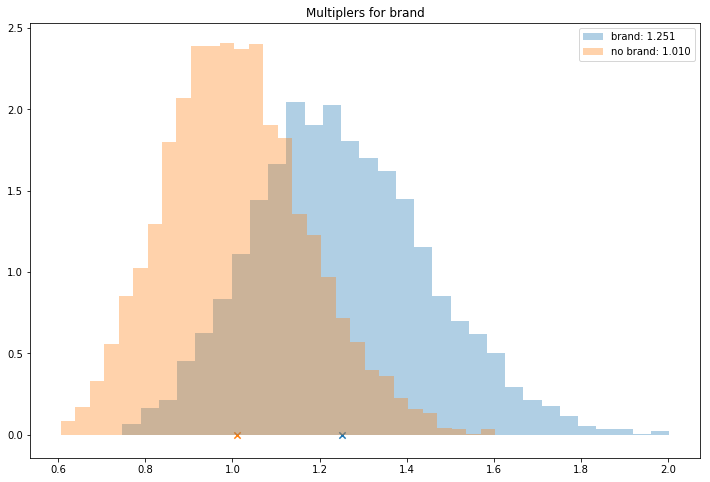

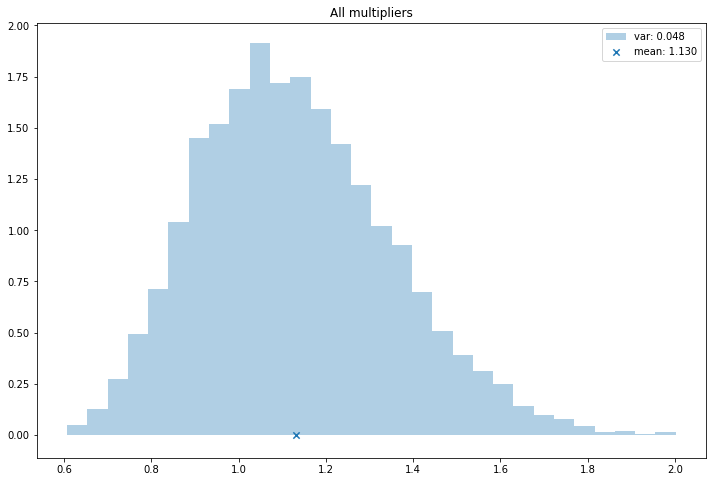

95% CI for all brand multipliers is: (0.7515993413173053, 1.60630826625464)
___LOC___


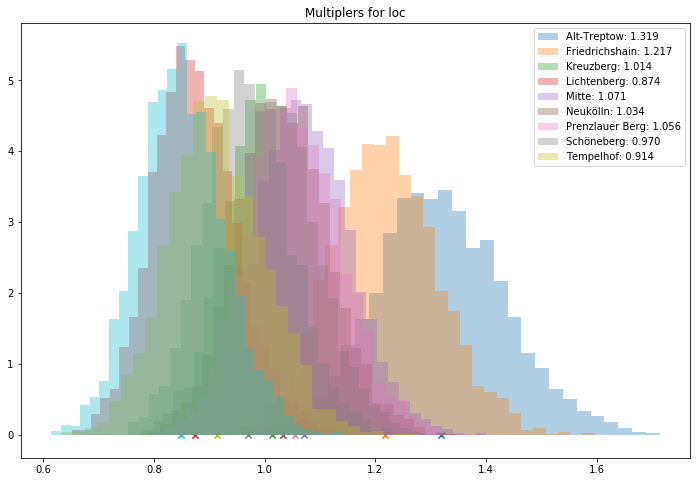

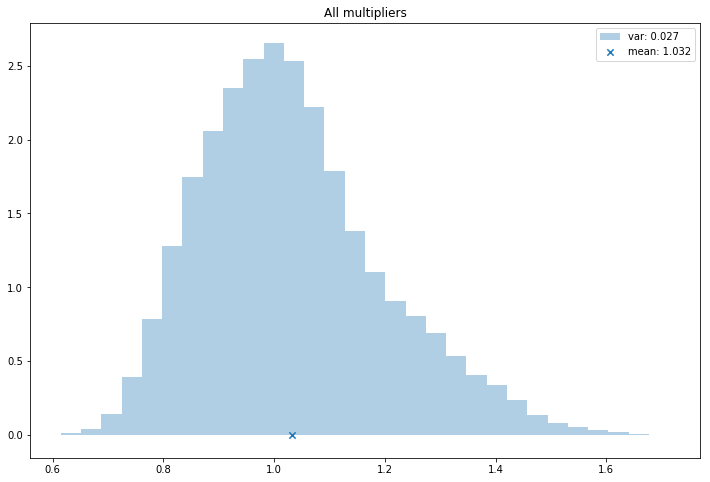

95% CI for all loc multipliers is: (0.7674294471824359, 1.407117897161256)
___EFFECT OF EACH MULTIPLIER___


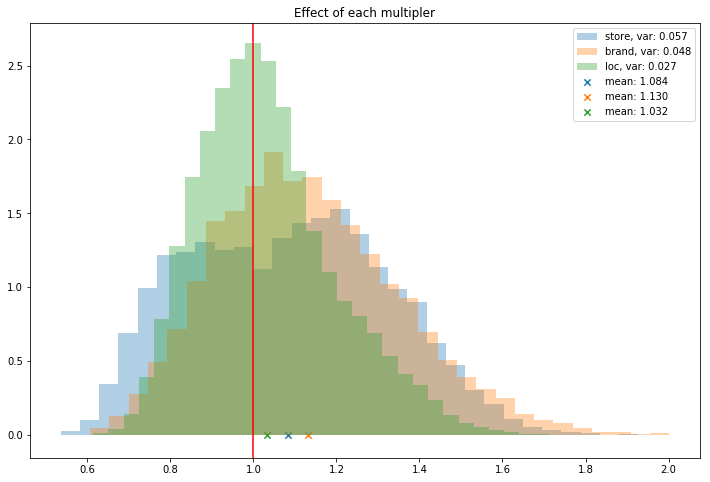

In [10]:
summarize_everything(results, name)

In [11]:
def present_data(results, name, what): 
    if what == 'store': 
        what_ = 'mul_S'
    elif what == 'product': 
        what_ = 'base'
    elif what == 'brand':
        what_ = 'mul_B'
    else: 
        what_ = 'mul_L'
    index = ['mean', 'variance', '2.5%', '50.0%', '97.5%']
    columns = name[what]
    table = pd.DataFrame(index=index, columns=columns)
    data_ = results[what_]
    table.iloc[0,:] = np.mean(data_, axis=0)
    table.iloc[1,:] = np.var(data_, axis=0)
    table.iloc[2,:] = np.percentile(data_, 2.5, axis=0)
    table.iloc[3,:] = np.percentile(data_, 50.0, axis=0)
    table.iloc[4,:] = np.percentile(data_, 97.5, axis=0)
    return table.T

In [12]:
p = present_data(results, name, 'product')
s = present_data(results, name, 'store')
b = present_data(results, name, 'brand')
loc_data = present_data(results, name, 'loc')
loc_mean = loc_data['mean'].iloc[0:-1]

pd.concat((p,s,b,loc_data), axis=0)

,mean,variance,2.5%,50.0%,97.5%
apple,1.65154,0.110943,1.10327,1.61986,2.43779
banana,1.10337,0.0518559,0.730972,1.08334,1.63832
butter,2.86778,0.33292,1.92925,2.81424,4.22805
chicken,7.59725,2.32131,5.11794,7.46636,11.2062
egg,1.94323,0.15412,1.30097,1.90787,2.85611
flour,0.780936,0.0280016,0.51444,0.761104,1.16539
milk,0.716483,0.0232486,0.469851,0.701078,1.06366
potato,0.957503,0.0399434,0.633959,0.935612,1.43724
rice,1.82792,0.135399,1.23113,1.79342,2.69203
tomato,2.67771,0.288736,1.81432,2.62624,3.93792


In [13]:
#euro/m^2/month -->http://www.gateberlin.de/immobilienmarkt-trends 

rental_price = pd.DataFrame(index = range(1), columns = name['loc']).drop(columns = ['_London'])

rental_price.iloc[0,:] = np.array([7.77, 11.00, 11.00, 8.05, 10.70, 8.78, 9.47, 8.91, 8.92])  
# rental_price.to_csv('/Users/ash/Downloads/rental_price_berlin.csv')

In [14]:
x_1, x_2 = np.array(rental_price.iloc[0,:], dtype=float), np.array(loc_mean, dtype=float)
X = np.stack((x_1, x_2), axis=0)

corr = np.corrcoef(X)
cov = np.cov(X)

print("Pearson'r:", corr[0,1])
print("Covariance:")
print('')
print(cov)

Pearson'r: 0.10897407561687115
Covariance:

[[1.51865    0.01886825]
 [0.01886825 0.01974055]]


In [48]:
model_spec_3 = """

data {
    int<lower=1> S; 
    int<lower=1> B;
    int<lower=1> L;
    int<lower=1> N;
    
    vector<lower=0>[S] store[N];
    vector<lower=0>[B] brand[N];
    vector<lower=0>[L] loc[N];
    
    real<lower=0> price[N];
    
    vector[L] multi_m; 
    cov_matrix[L] multi_var;
}

parameters {
    
    real<lower=0> v;
    real<lower=0> base;
    row_vector<lower=0>[S] mul_S;
    row_vector<lower=0>[B] mul_B;
    row_vector<lower=0>[L] mul_L;
}

model {
    
    base ~ cauchy(0,1);
    for (s in 1:S){
        mul_S[s] ~ lognormal(0,0.25);
    }
    
    for (b in 1:B){
        mul_B[b] ~ lognormal(0,0.25);
    }
    
//Sampling from a multivariate normal distribution to express spatial correlation
    mul_L ~ multi_normal(multi_m, multi_var);
    
    for(i in 1:N) {
        price[i] ~ normal(base*((mul_S*store[i])*(mul_B*brand[i])*(mul_L*loc[i])), v); 
    }
}

"""
model_sg = pystan.StanModel(model_code=model_spec_3)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_bdd9b00bf0c8bf01acf38b5f378ab42b NOW.
/Users/ash/anaconda3/lib/python3.6/site-packages/Cython/Compiler/Main.py:367: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /var/folders/kg/zv3bhpmx19s5f8hsk7h4_wnc0000gn/T/tmpqai2m4cd/stanfit4anon_model_bdd9b00bf0c8bf01acf38b5f378ab42b_4078621103671042568.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)


In [65]:
from sklearn.metrics.pairwise import rbf_kernel 

distances = pd.read_csv('/Users/ash/Downloads/distance.csv')
x = np.array(distances['x '], dtype=float)
y = np.array(distances['y'], dtype=float)


distances = np.zeros((x.shape[0],2))
distances[:,0] = x
distances[:,1] = y
K = rbf_kernel(distances, gamma=0.1)
pd.DataFrame(K, index=name['loc'][0:9], columns=name['loc'][0:9])

,Alt-Treptow,Friedrichshain,Kreuzberg,Lichtenberg,Mitte,Neukölln,Prenzlauer Berg,Schöneberg,Tempelhof
Alt-Treptow,1.000000,0.445668,0.194919,0.351942,0.017516,0.814126,0.045091,0.015931,0.059623
Friedrichshain,0.445668,1.000000,0.117531,0.641818,0.071713,0.185241,0.423797,0.003289,0.002864
Kreuzberg,0.194919,0.117531,1.000000,0.016929,0.290004,0.268193,0.051579,0.416524,0.135594
Lichtenberg,0.351942,0.641818,0.016929,1.000000,0.005304,0.113889,0.121693,0.000211,0.000681
Mitte,0.017516,0.071713,0.290004,0.005304,1.000000,0.012809,0.232773,0.053881,0.001799
Neukölln,0.814126,0.185241,0.268193,0.113889,0.012809,1.000000,0.013168,0.049571,0.219325
Prenzlauer Berg,0.045091,0.423797,0.051579,0.121693,0.232773,0.013168,1.000000,0.001105,0.000118
Schöneberg,0.015931,0.003289,0.416524,0.000211,0.053881,0.049571,0.001105,1.000000,0.249110
Tempelhof,0.059623,0.002864,0.135594,0.000681,0.001799,0.219325,0.000118,0.249110,1.000000


In [61]:
name['loc']

Index(['Alt-Treptow', 'Friedrichshain', 'Kreuzberg', 'Lichtenberg', 'Mitte',
       'Neukölln', 'Prenzlauer Berg', 'Schöneberg', 'Tempelhof', '_London'],
      dtype='object')

In [66]:
def produce_stan_data_3(product, K, data=data): 
    processed = data.loc[data['product'] == product].drop(columns=['product'])
    processed = processed.sample(frac=1.0)
    
    store = pd.get_dummies(processed['store_brand'])
    name_s = store.columns
    store = np.array(store, dtype=int)
    
    brand = pd.get_dummies(processed['brand'])
    name_b = brand.columns
    brand = np.array(brand, dtype=int)
    
    loc = pd.get_dummies(processed['neighborhood'])
    name_l = loc.columns[0:9]
    loc = np.array(loc.iloc[:,0:9], dtype=int)
    
    price = np.array(processed['price'], dtype=float)
    
    data_dict = {
        'S': store.shape[1],
        'B': brand.shape[1],
        'L': loc.shape[1],
        'N': store.shape[0],
        
        'store': store, 
        'brand': brand, 
        'loc': loc, 
        
        'price': price,
        
        'multi_m': np.ones(loc.shape[1]),
        'multi_var': K
    }
    
    name_dict = {
        'store': name_s,
        'brand': name_b,
        'loc': name_l
    }
    return data_dict, name_dict

def summarize_product_3(product, K):
    stan_data, name = produce_stan_data_3(product, K)
    results = model_sg.sampling(data=stan_data)
    
    print('***'*39)
    print('Summary of sampling results for {}:'.format(product))
    print('***'*39)
    
    print('___BASE PRICE___')
    base = results['base']
    plt.figure(figsize=(12,8))
    plt.hist(base, alpha=0.35, bins=30, density=True, label='var: {0:.3f}'.format(base.var()))
    plt.scatter(base.mean(), 0, marker='x', s=40, label='mean: {0:.3f}'.format(base.mean()))
    plt.title('Base price')
    plt.legend()
    print('95% CI for base price is:', (np.percentile(base,2.5),np.percentile(base,97.5)))
    plt.show()
    
    dumb = []
    for _ in ['store', 'brand', 'loc']:
        print('___{}___'.format(_.upper()))
        dumb.append(plot_multiplier_variance(results,name,_))
        
    print('___EFFECT OF EACH MULTIPLIER___')
    plt.figure(figsize=(12,8))
    for i in range(len(dumb)):
        dumb_2 = ['store', 'brand', 'loc']
        plt.hist(dumb[i], alpha=0.35, bins=30, density=True, label='{}'.format(dumb_2[i]))
        plt.scatter(dumb[i].mean(), 0, marker='x', s=40, label='mean: {0:.3f}'.format(dumb[i].mean()))
    plt.axvline(x=1, color='r')
    plt.legend()
    plt.title('Effect of each multipler')
    plt.show()

*********************************************************************************************************************
Summary of sampling results for apple:
*********************************************************************************************************************
___BASE PRICE___
95% CI for base price is: (0.6991622091950653, 1.9568385449999943)


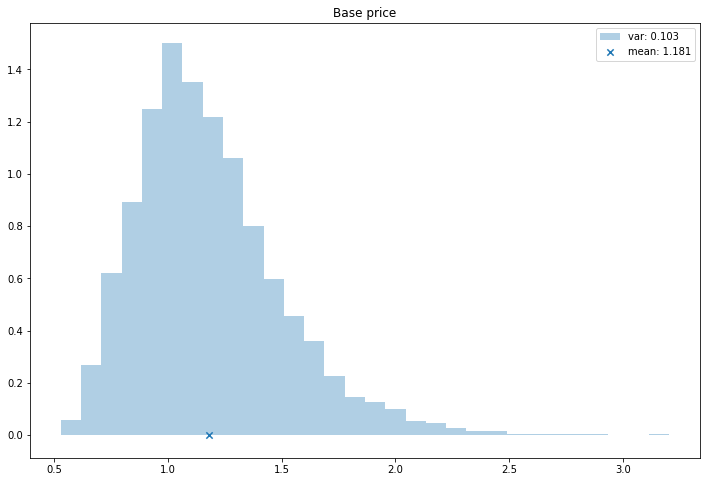

___STORE___


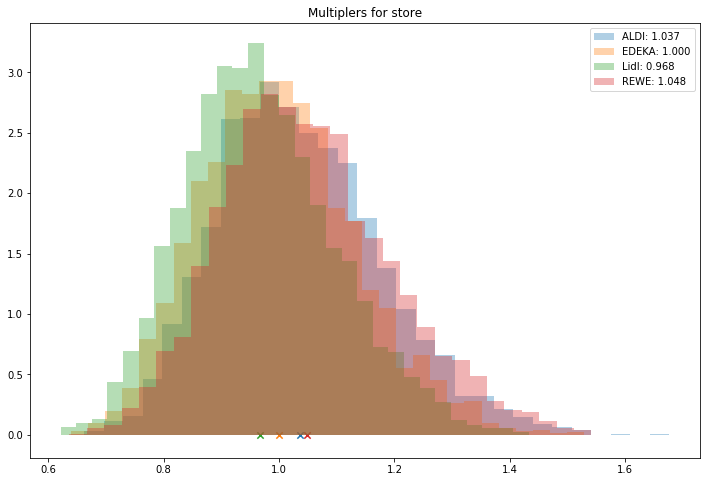

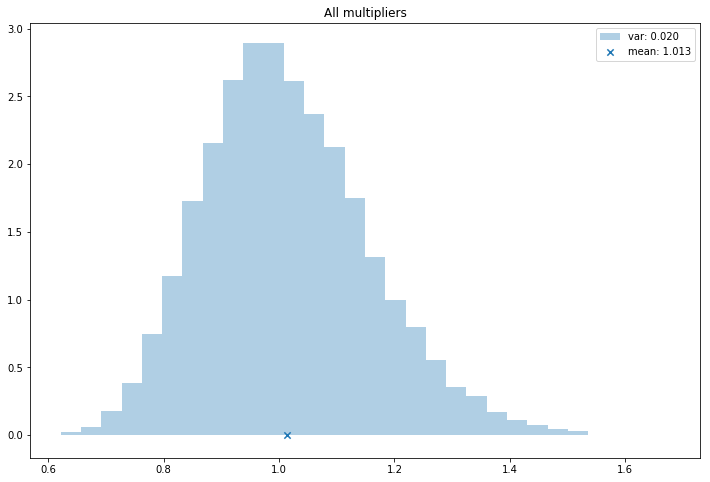

95% CI for all store multipliers is: (0.7679684215509245, 1.3258295364044037)
___BRAND___


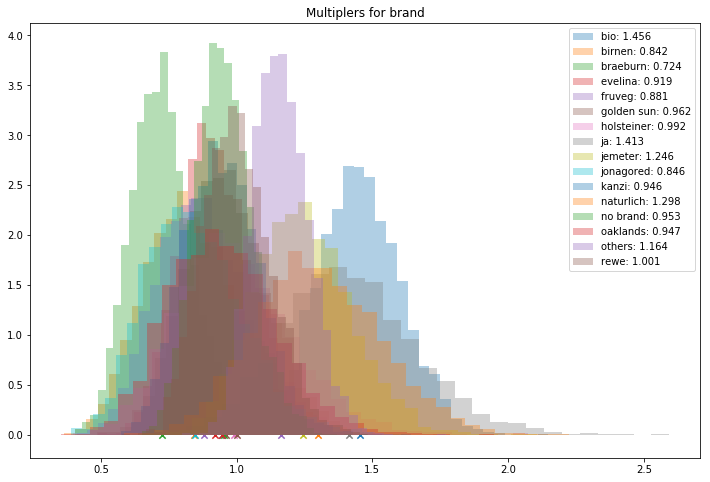

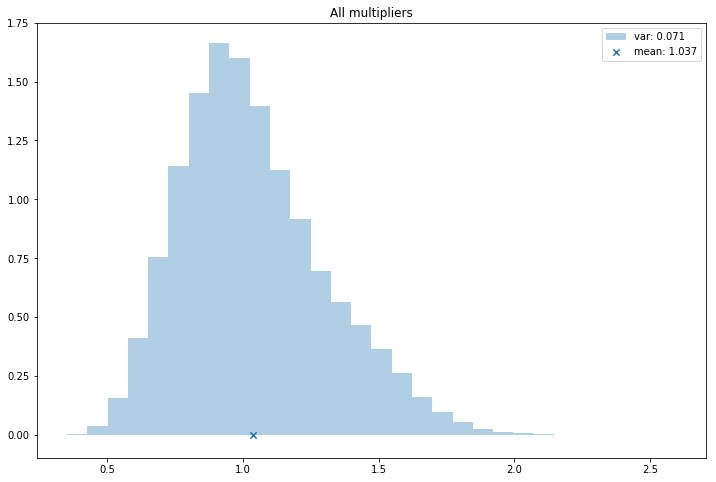

95% CI for all brand multipliers is: (0.6075293652565591, 1.6351373382746544)
___LOC___


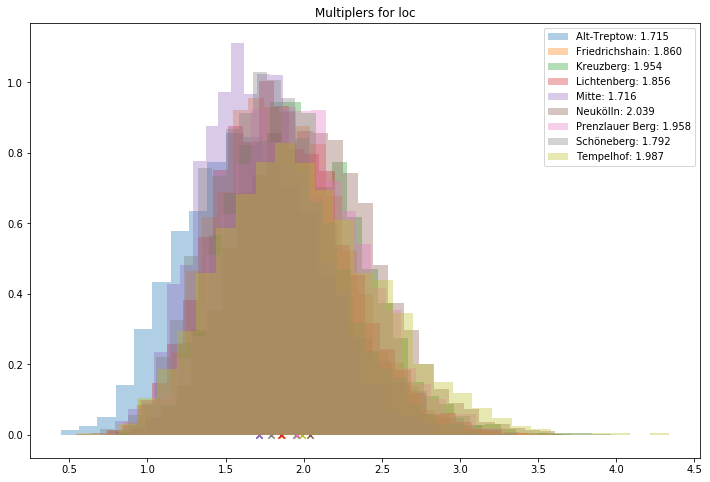

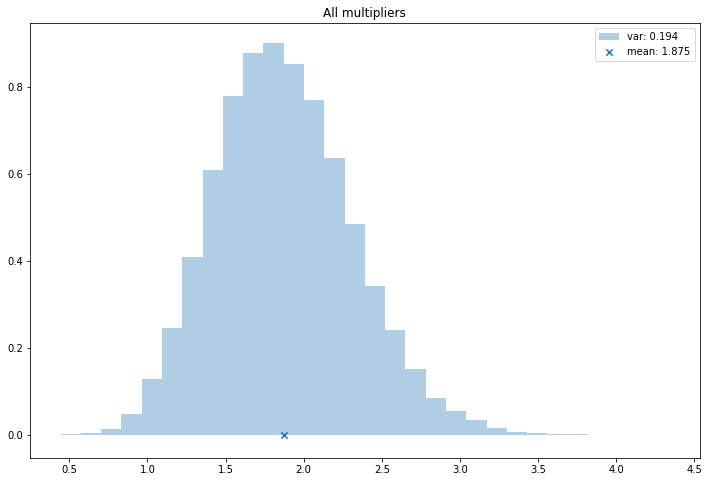

95% CI for all loc multipliers is: (1.0898779884220935, 2.7993449613109016)
___EFFECT OF EACH MULTIPLIER___


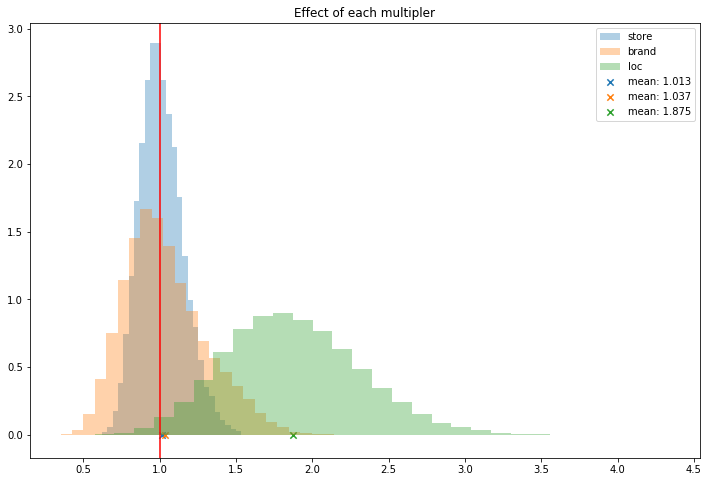

In [67]:
summarize_product_3('apple', K)